In [1]:
#importing dependenices
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from scipy.stats import skew
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from collections import Counter
from matplotlib import pyplot

# Data Collection

In [2]:
cr_dataset=pd.read_excel("C:/Users/mohit/Machine learning capstone projects/customer retention.xls")

In [3]:
pd.set_option('display.max_columns',None)
cr_dataset

1Gender of respondent 2 How old are you?   \
0                    Male         31-40 years   
1                  Female         21-30 years   
2                  Female         21-30 years   
3                    Male         21-30 years   
4                  Female         21-30 years   
..                    ...                 ...   
264                Female         21-30 years   
265                Female         31-40 years   
266                Female         41-50 yaers   
267                Female  Less than 20 years   
268                Female         41-50 yaers   

    3 Which city do you shop online from?  \
0                                   Delhi   
1                                   Delhi   
2                           Greater Noida   
3                                 Karnal    
4                              Bangalore    
..                                    ...   
264                                 Solan   
265                             Ghaziabad   
266                            Bangalore    
267                                 Solan   
268                             Ghaziabad   

     4 What is the Pin Code of where you shop online from?  \
0                                               110009       
1                                               110030       
2                                               201308       
3                                               132001       
4                                               530068       
..                                                 ...       
264                                             173212       
265                                             201008       
266                                             560010       
267                                             173229       
268                                             201009       

    5 Since How Long You are Shopping Online ?  \
0                                Above 4 years   
1                                Above 4 years   
2                                    3-4 years   
3                                    3-4 years   
4                                    2-3 years   
..                                         ...   
264                                  1-2 years   
265                                  1-2 years   
266                                  2-3 years   
267                                  2-3 years   
268                                  2-3 years   

    6 How many times you have made an online purchase in the past 1 year?  \
0                                          31-40 times                      
1                                   41 times and above                      
2                                   41 times and above                      
3                                   Less than 10 times                      
4                                          11-20 times                      
..                                                 ...                      
264                                 Less than 10 times                      
265                                        31-40 times                      
266                                 Less than 10 times                      
267                                 Less than 10 times                      
268                                        31-40 times                      

    7 How do you access the internet while shopping on-line?  \
0                                              Dial-up         
1                                                Wi-Fi         
2                                      Mobile Internet         
3                                      Mobile Internet         
4                                                Wi-Fi         
..                                                 ...         
264                                    Mobile Internet         
265                                    Mobile Internet         
266                        

# Exploratory Data Analysis

**Descriptive Analysis

In [4]:
#fetching unique elements count in the dataset
for i in cr_dataset:
    print(i," : ",cr_dataset[i].nunique())

1Gender of respondent  :  2
2 How old are you?   :  5
3 Which city do you shop online from?  :  11
4 What is the Pin Code of where you shop online from?  :  39
5 Since How Long You are Shopping Online ?  :  5
6 How many times you have made an online purchase in the past 1 year?  :  6
7 How do you access the internet while shopping on-line?  :  4
8 Which device do you use to access the online shopping?  :  4
9 What is the screen size of your mobile device?						                                          :  4
10 What is the operating system (OS) of your device?				                                            :  3
11 What browser do you run on your device to access the website?			                                                            :  4
12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                     :  3
13 After first visit, how do you reach the online retail store?				                   

In [5]:
#numbet of rows and columns of the dataset
cr_dataset.shape

(269, 71)

In [6]:
#fetching info the dataset
cr_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 71 columns):
 #   Column                                                                                                                                                                                                          Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                          --------------  ----- 
 0   1Gender of respondent                                                                                                                                                                                           269 non-null    object
 1   2 How old are you?                                                                                                                                                                    

In [7]:
# searching for null or missing values in the dataset
for i in cr_dataset:
    print(i," : ",cr_dataset[i].isnull().sum())

1Gender of respondent  :  0
2 How old are you?   :  0
3 Which city do you shop online from?  :  0
4 What is the Pin Code of where you shop online from?  :  0
5 Since How Long You are Shopping Online ?  :  0
6 How many times you have made an online purchase in the past 1 year?  :  0
7 How do you access the internet while shopping on-line?  :  0
8 Which device do you use to access the online shopping?  :  0
9 What is the screen size of your mobile device?						                                          :  0
10 What is the operating system (OS) of your device?				                                            :  0
11 What browser do you run on your device to access the website?			                                                            :  0
12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                     :  0
13 After first visit, how do you reach the online retail store?				                     

In [8]:
#accquiring the columns in the data set
column=cr_dataset.columns
column

Index(['1Gender of respondent', '2 How old are you? ',
       '3 Which city do you shop online from?',
       '4 What is the Pin Code of where you shop online from?',
       '5 Since How Long You are Shopping Online ?',
       '6 How many times you have made an online purchase in the past 1 year?',
       '7 How do you access the internet while shopping on-line?',
       '8 Which device do you use to access the online shopping?',
       '9 What is the screen size of your mobile device?\t\t\t\t\t\t                                        ',
       '10 What is the operating system (OS) of your device?\t\t\t\t                                          ',
       '11 What browser do you run on your device to access the website?\t\t\t                                                          ',
       '12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                   ',
       '13 After first visit, how 

In [9]:
# getting the count of individual unique element present each column of the dataset
for i in cr_dataset:
    print(cr_dataset[i].value_counts(),'\n\n')

Female    181
Male       88
Name: 1Gender of respondent, dtype: int64 


31-40 years           81
21-30 years           79
41-50 yaers           70
Less than 20 years    20
51 years and above    19
Name: 2 How old are you? , dtype: int64 


Delhi            58
Greater Noida    43
Noida            40
Bangalore        37
Karnal           27
Solan            18
Ghaziabad        18
Gurgaon          12
Merrut            9
Moradabad         5
Bulandshahr       2
Name: 3 Which city do you shop online from?, dtype: int64 


201308    38
132001    19
201310    18
110044    16
250001     9
173229     9
173212     9
560010     8
132036     8
122018     8
560037     8
110008     7
110011     7
201306     7
110014     6
110018     6
201305     5
201008     5
201009     5
201312     5
244001     5
530068     5
122009     4
201001     4
560003     4
201304     4
110009     4
201303     4
560002     4
560018     4
110042     4
110030     4
201005     4
110039     4
560013     3
203001     2
203202    

Name: Website is as efficient as before, dtype: int64 


Amazon.in                                            79
Amazon.in, Flipkart.com                              62
Flipkart.com                                         39
Amazon.in, Myntra.com                                30
Amazon.in, Paytm.com, Myntra.com                     20
Amazon.in, Flipkart.com, Myntra.com                  15
Amazon.in, Paytm.com                                 13
Flipkart.com, Paytm.com, Myntra.com, snapdeal.com    11
Name: Which of the Indian online retailer would you recommend to a friend?, dtype: int64 




In [10]:
#viewing the overall description of the dataset
cr_dataset.describe(include='all')

1Gender of respondent 2 How old are you?   \
count                    269                 269   
unique                     2                   5   
top                   Female         31-40 years   
freq                     181                  81   
mean                     NaN                 NaN   
std                      NaN                 NaN   
min                      NaN                 NaN   
25%                      NaN                 NaN   
50%                      NaN                 NaN   
75%                      NaN                 NaN   
max                      NaN                 NaN   

       3 Which city do you shop online from?  \
count                                    269   
unique                                    11   
top                                    Delhi   
freq                                      58   
mean                                     NaN   
std                                      NaN   
min                                      NaN   
25%                                      NaN   
50%                                      NaN   
75%                                      NaN   
max                                      NaN   

        4 What is the Pin Code of where you shop online from?  \
count                                          269.000000       
unique                                                NaN       
top                                                   NaN       
freq                                                  NaN       
mean                                        220465.747212       
std                                         140524.341051       
min                                         110008.000000       
25%                                         122018.000000       
50%                                         201303.000000       
75%                                         201310.000000       
max                                         560037.000000       

       5 Since How Long You are Shopping Online ?  \
count                                         269   
unique                                          5   
top                                 Above 4 years   
freq                                           98   
mean                                          NaN   
std                                           NaN   
min                                           NaN   
25%                                           NaN   
50%                                           NaN   
75%                                           NaN   
max                                           NaN   

       6 How many times you have made an online purchase in the past 1 year?  \
count                                                 269                      
unique                                                  6                      
top                                    Less than 10 times                      
freq                                                  114                      
mean                                                  NaN                      
std                                                   NaN                      
min                                                   NaN                      
25%                                                   NaN                      
50%                                                   NaN                      
75%                                                   NaN                      
max                                                   NaN                      

       7 How do you access the internet while shopping on-line?  \
count                                                 269         
unique                                                  4         
top                                       Mobile internet         
freq                                                  142         
mean                                                  NaN         
std                     

Descriptive Analysis Obsevation:
1. Dataset is small in size and imbalance.
2. All the data available is ordinal data except for pincode.
3. No null values are present in the dataset

# Data Visualization

1Gender of respondent


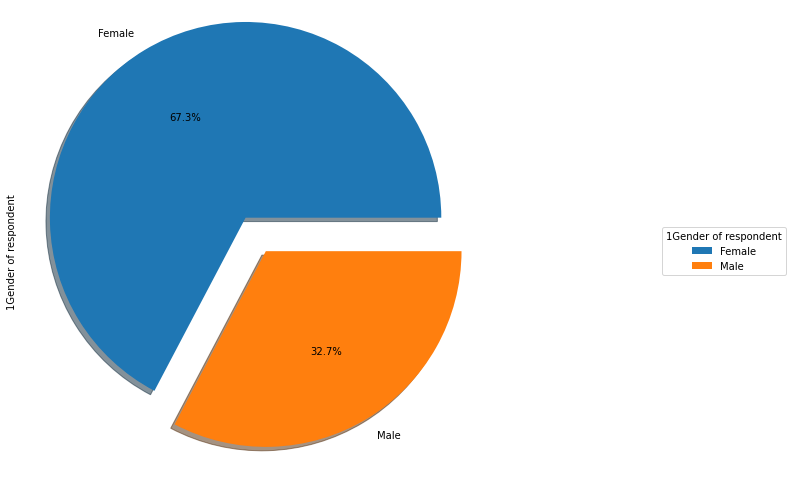




2 How old are you? 


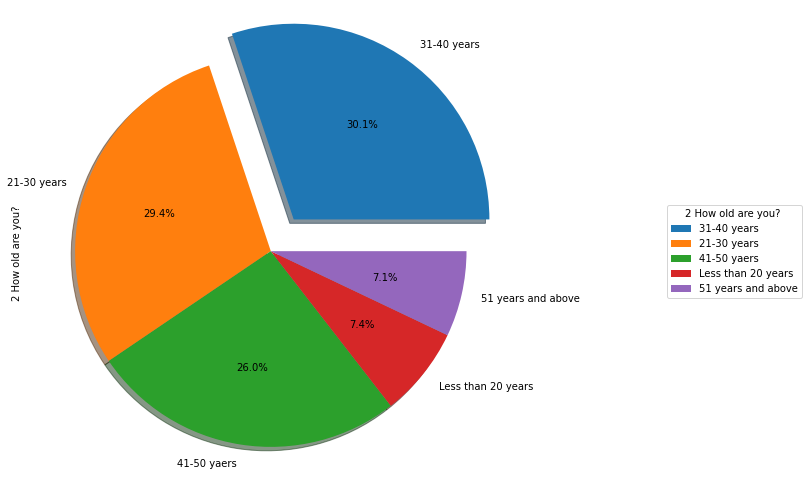




3 Which city do you shop online from?


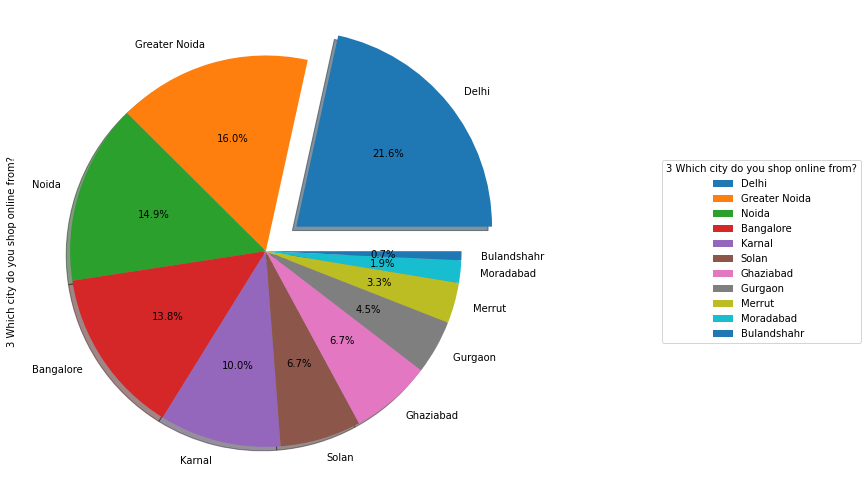




4 What is the Pin Code of where you shop online from?


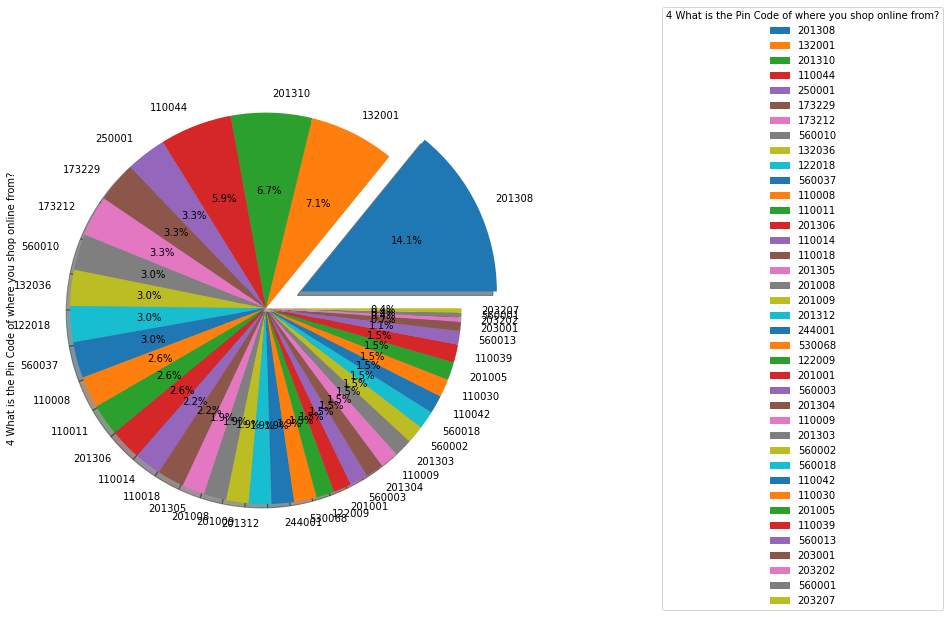




5 Since How Long You are Shopping Online ?


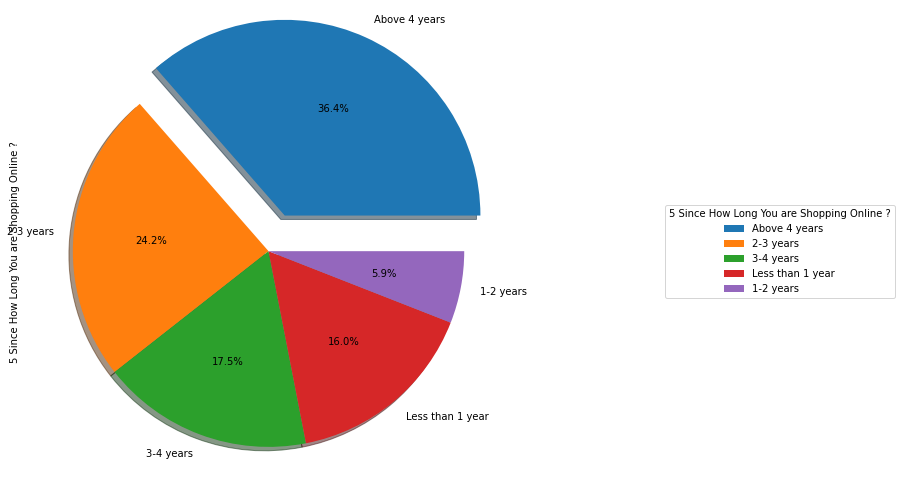




6 How many times you have made an online purchase in the past 1 year?


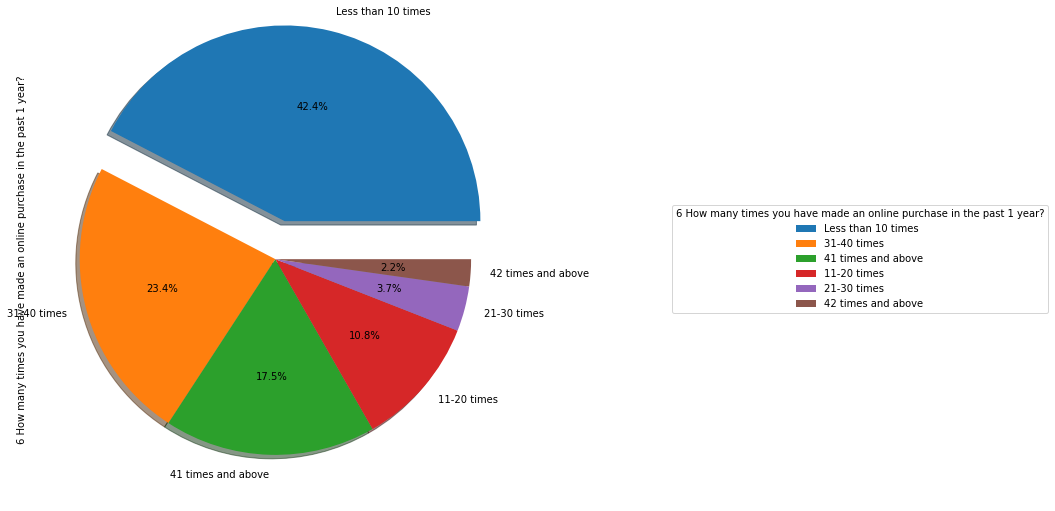




7 How do you access the internet while shopping on-line?


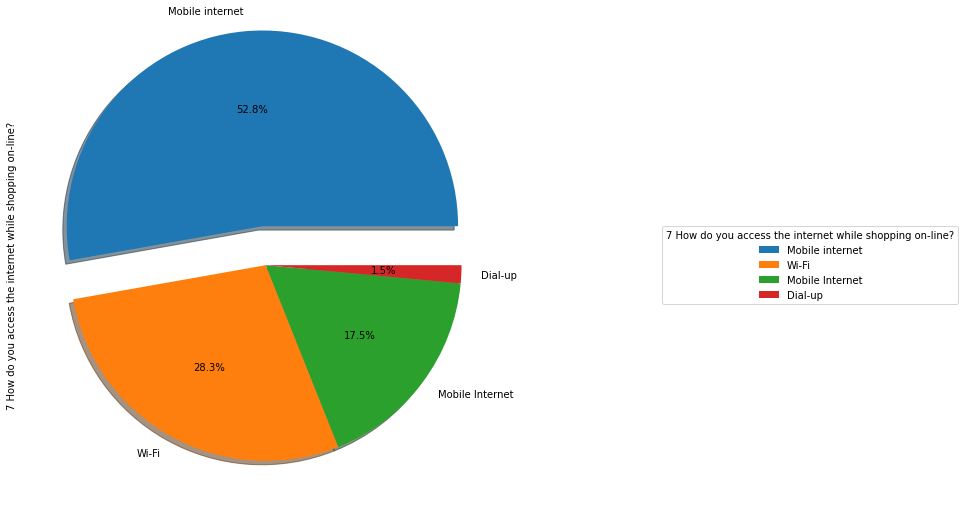




8 Which device do you use to access the online shopping?


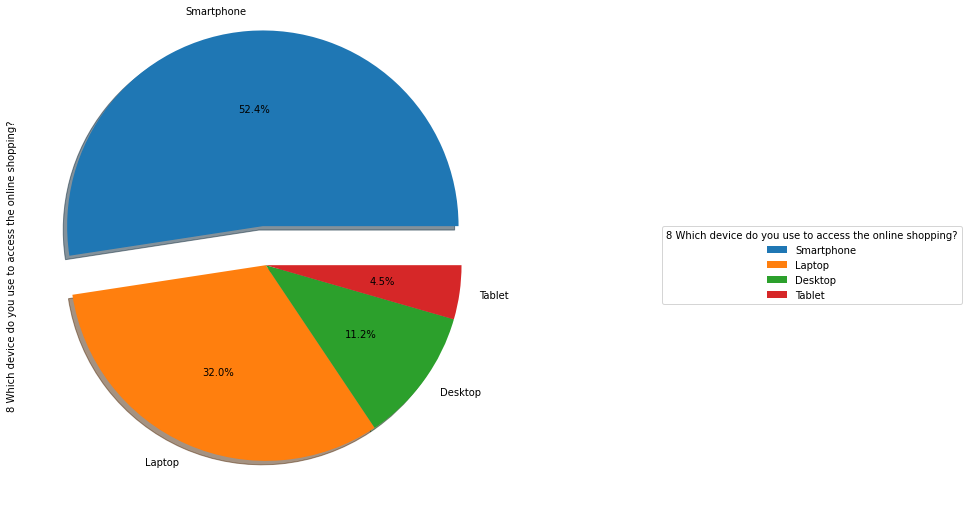




9 What is the screen size of your mobile device?						                                        


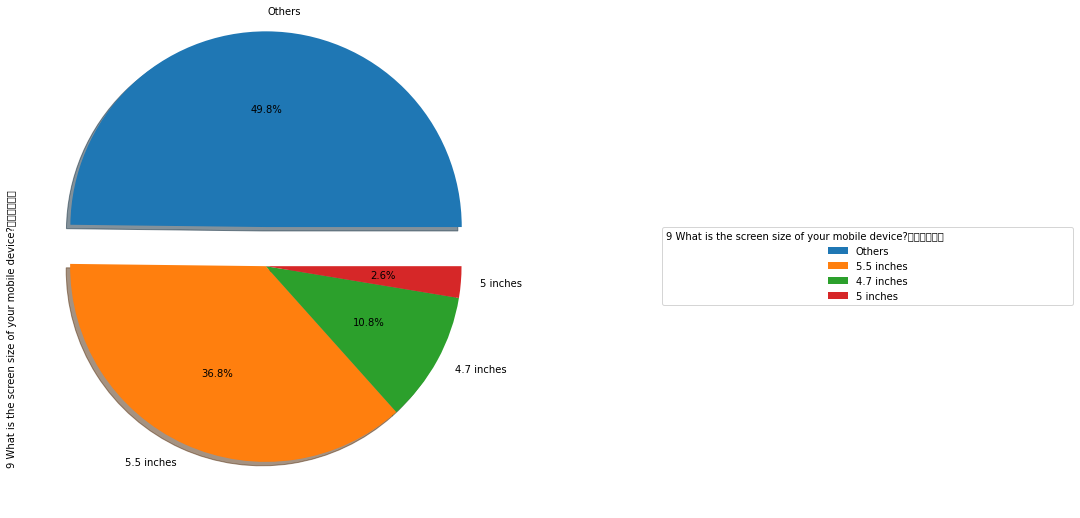




10 What is the operating system (OS) of your device?				                                          


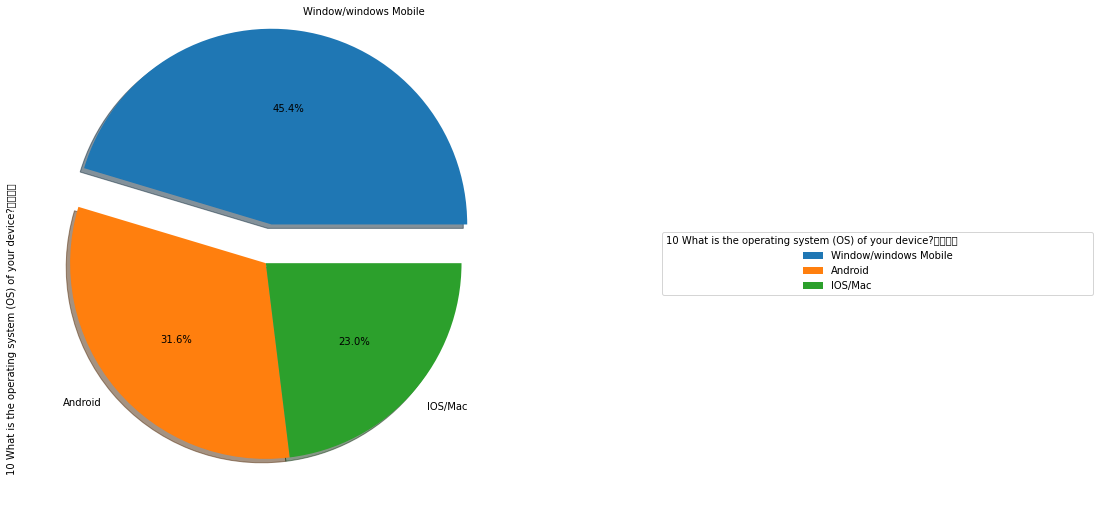




11 What browser do you run on your device to access the website?			                                                          


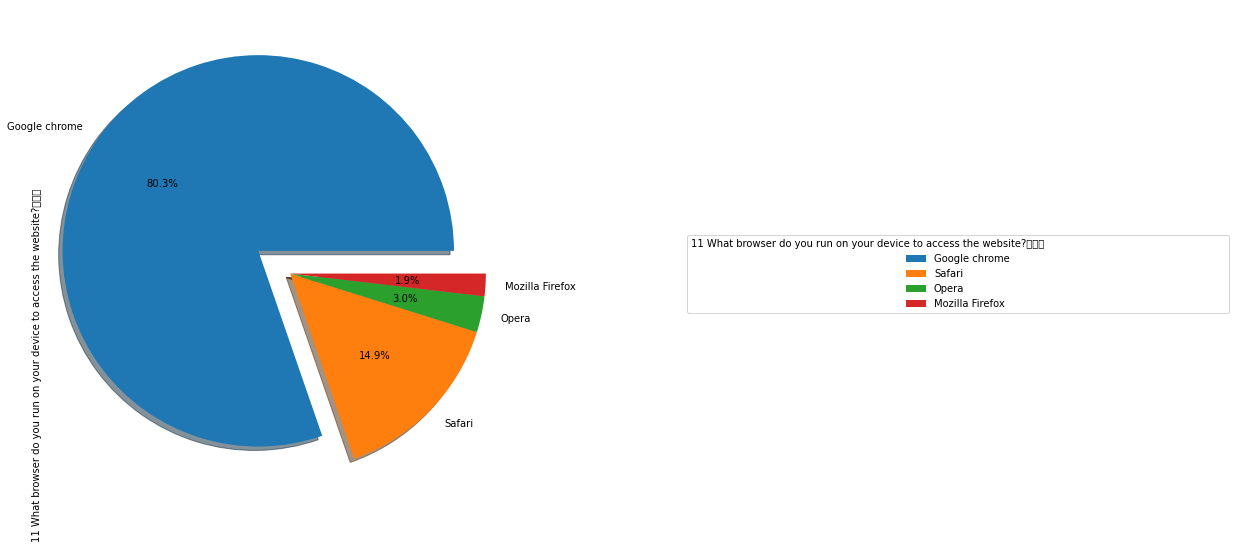




12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                   


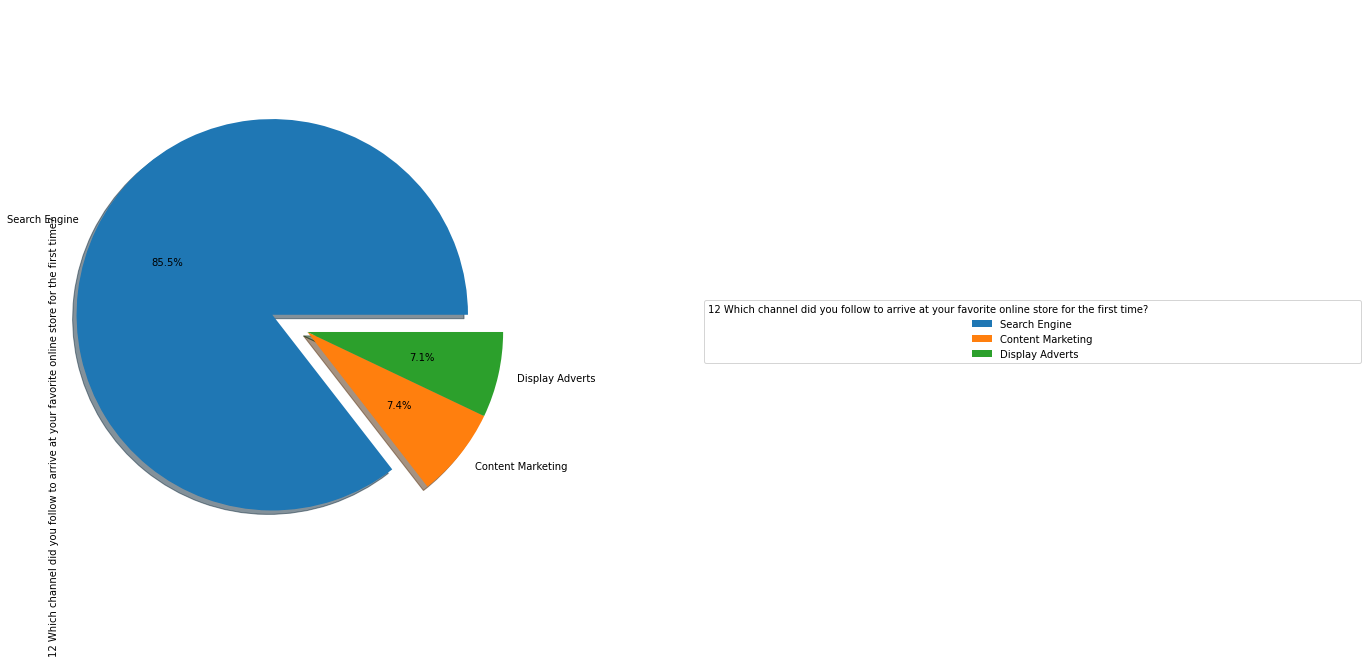




13 After first visit, how do you reach the online retail store?				                                                   


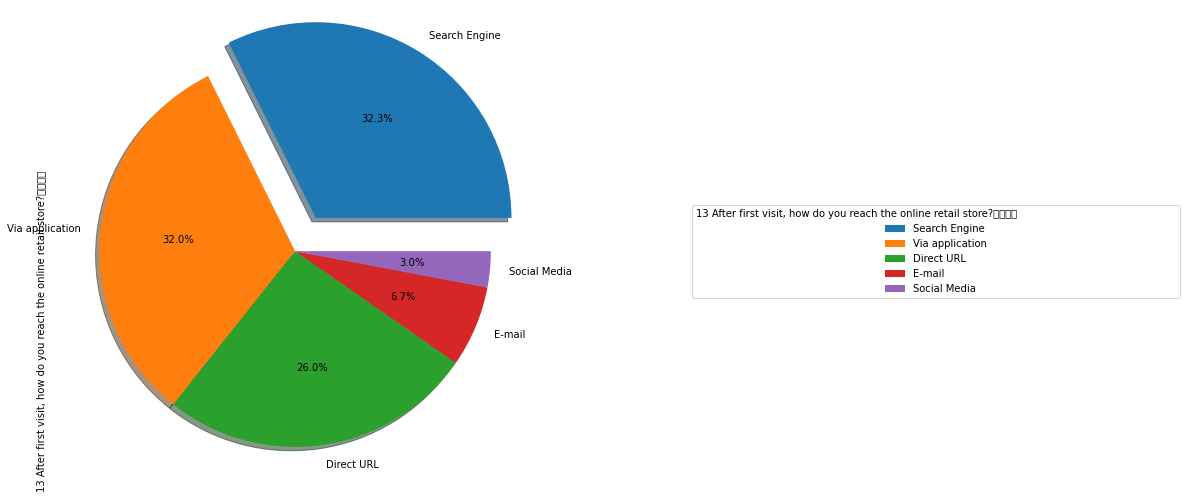




14 How much time do you explore the e- retail store before making a purchase decision?                                                                   


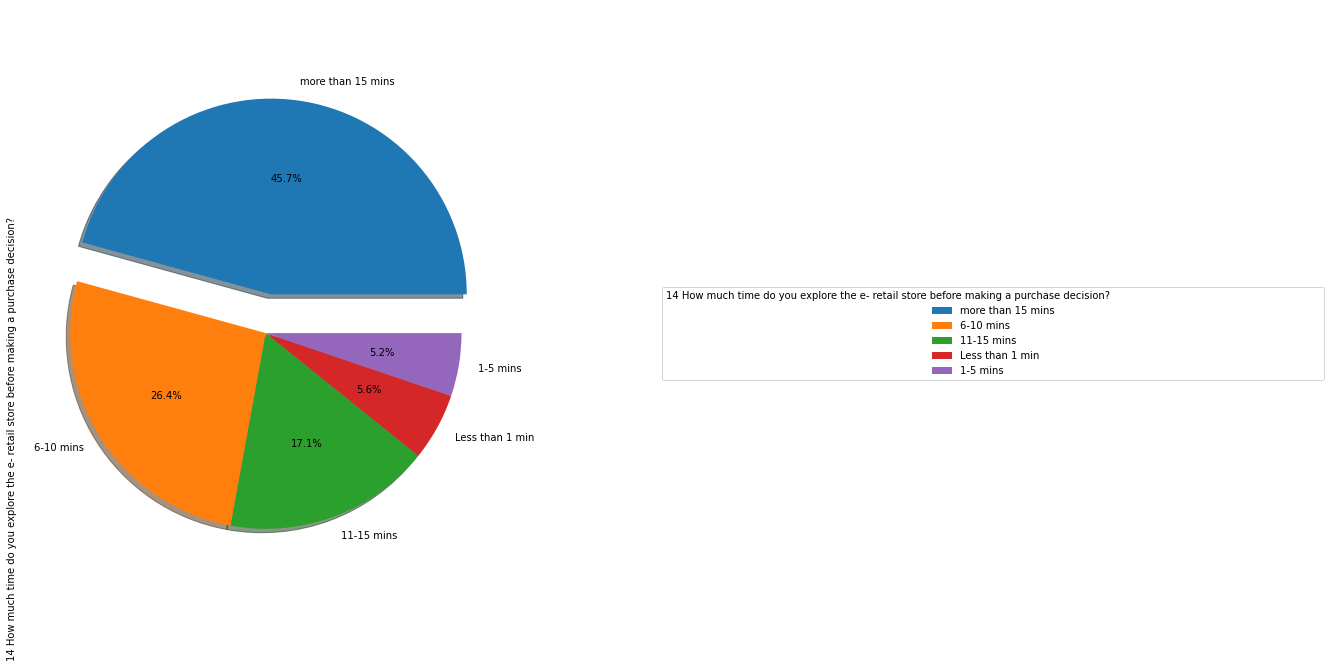




15 What is your preferred payment Option?					                                                                                                                               


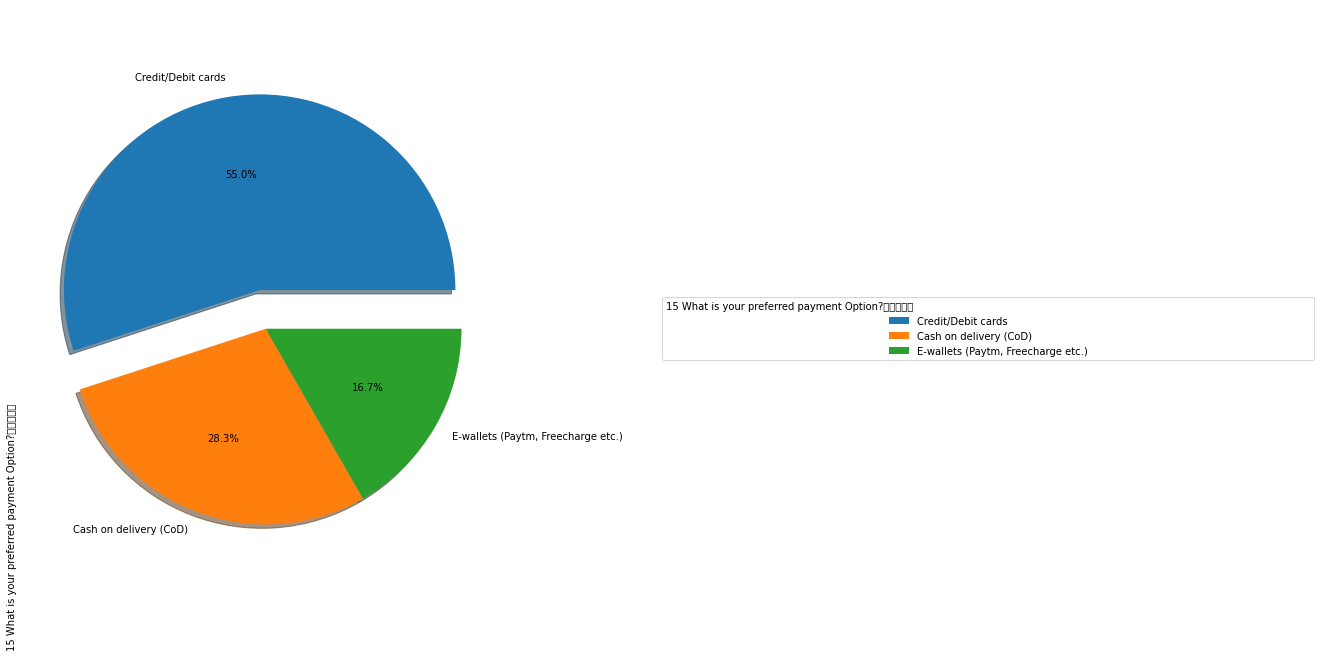




16 How frequently do you abandon (selecting an items and leaving without making payment) your shopping cart?							                                                   


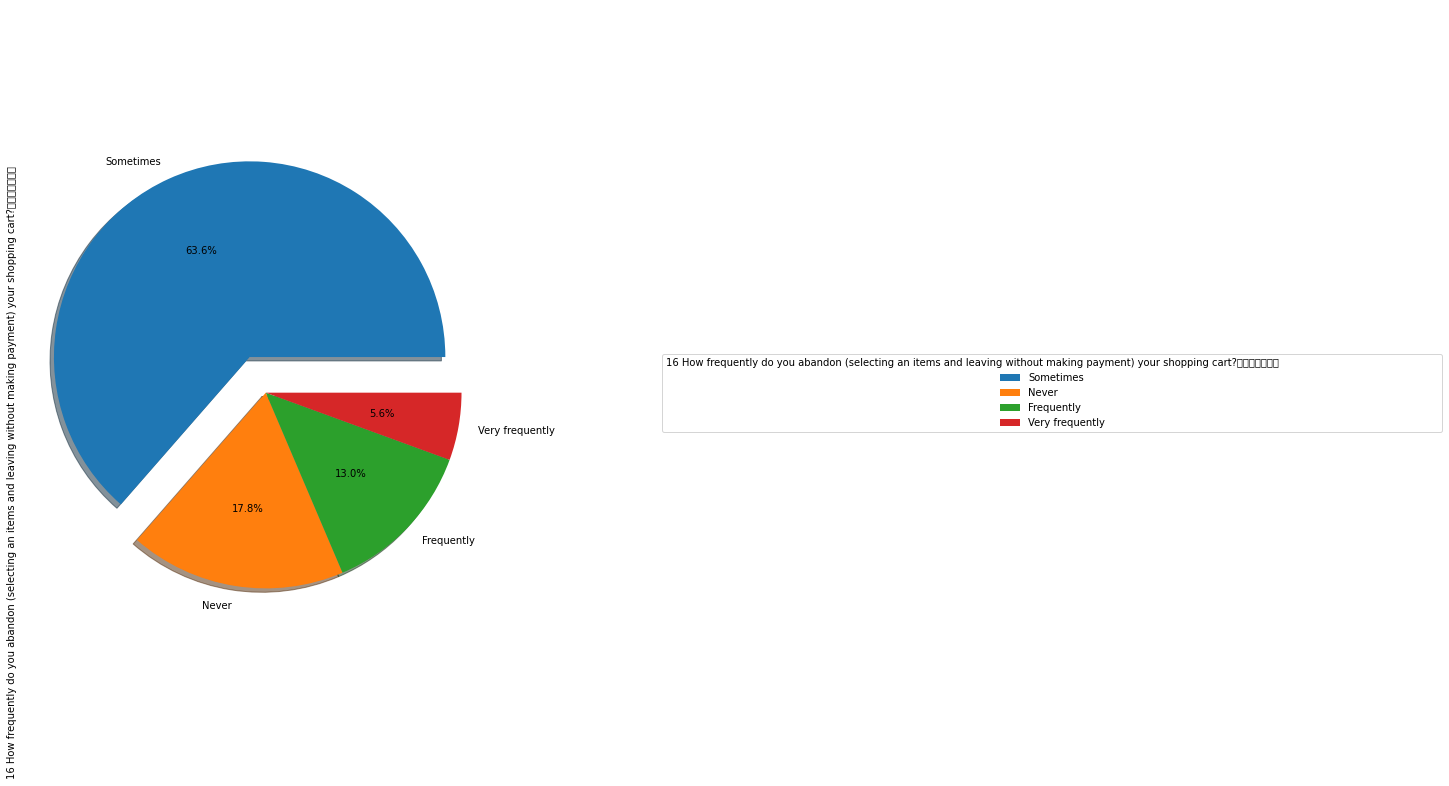




17 Why did you abandon the “Bag”, “Shopping Cart”?					                                                                                                                                                       


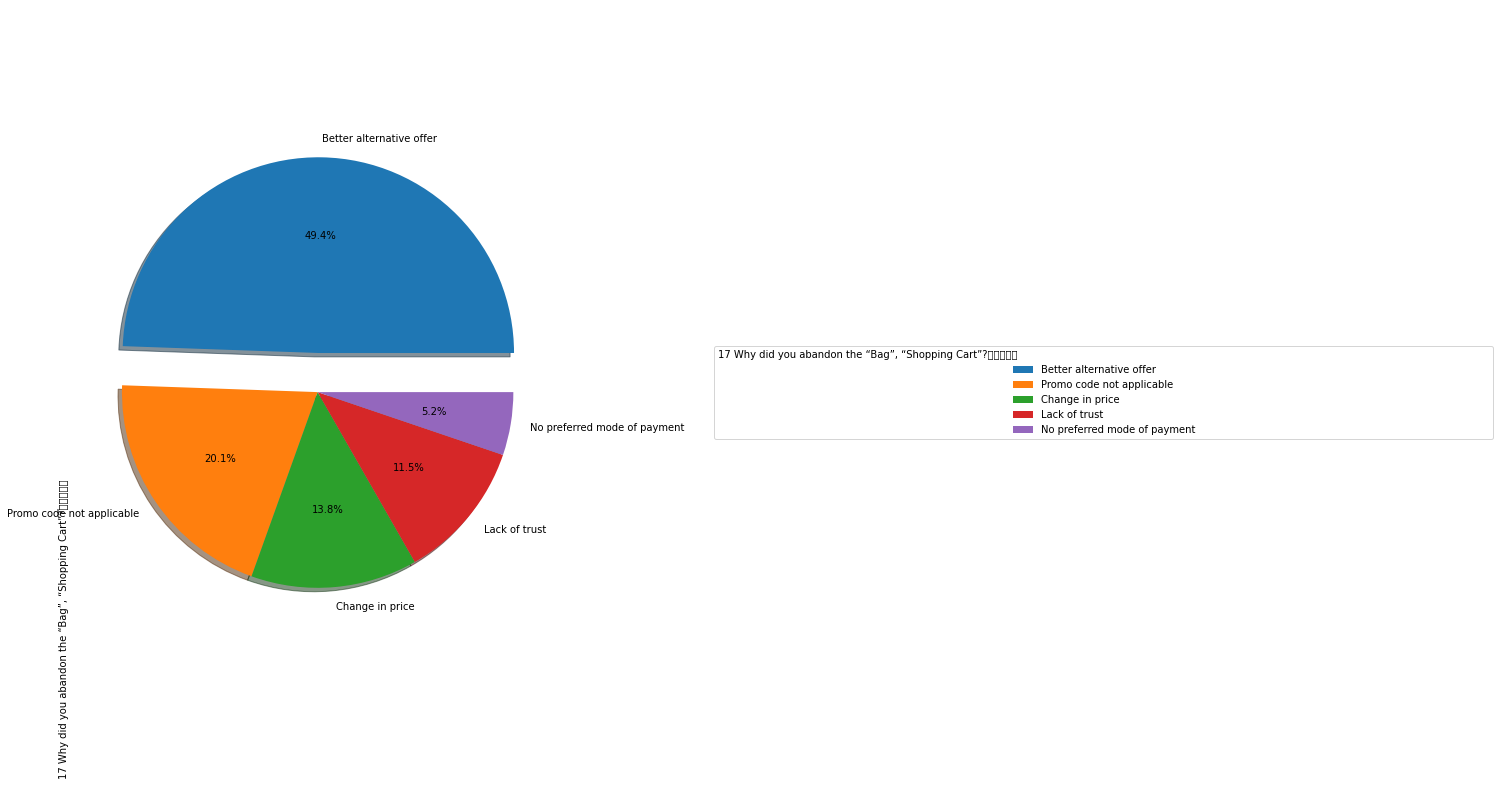




18 The content on the website must be easy to read and understand


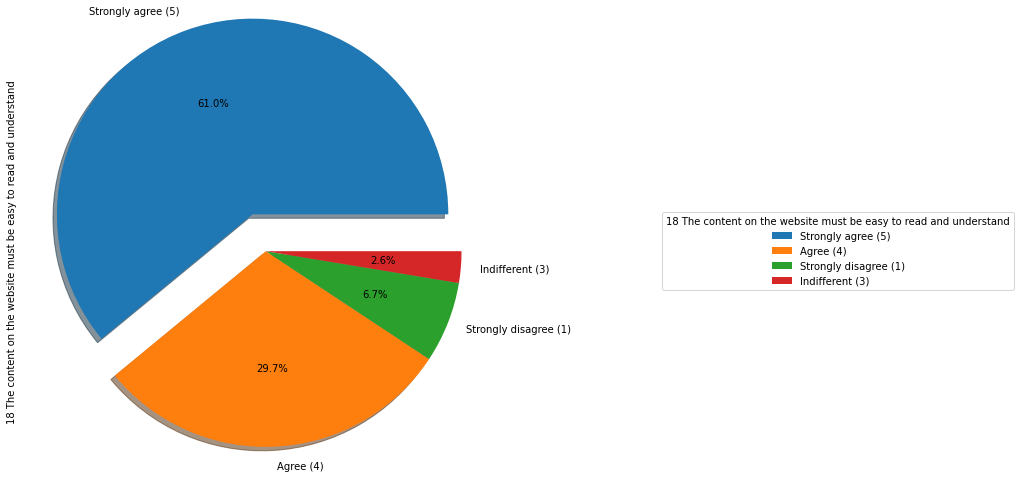




19 Information on similar product to the one highlighted  is important for product comparison


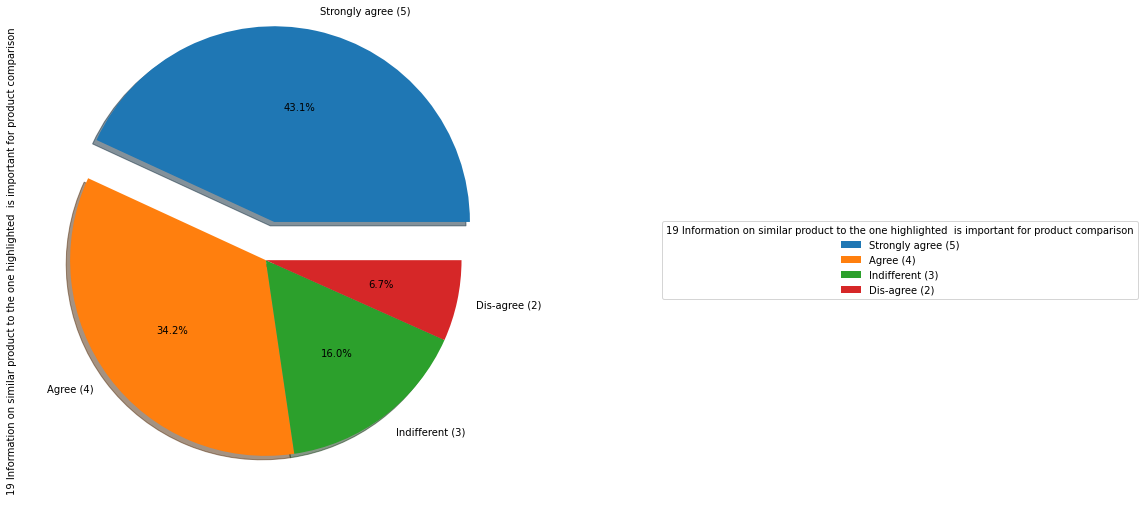




20 Complete information on listed seller and product being offered is important for purchase decision.


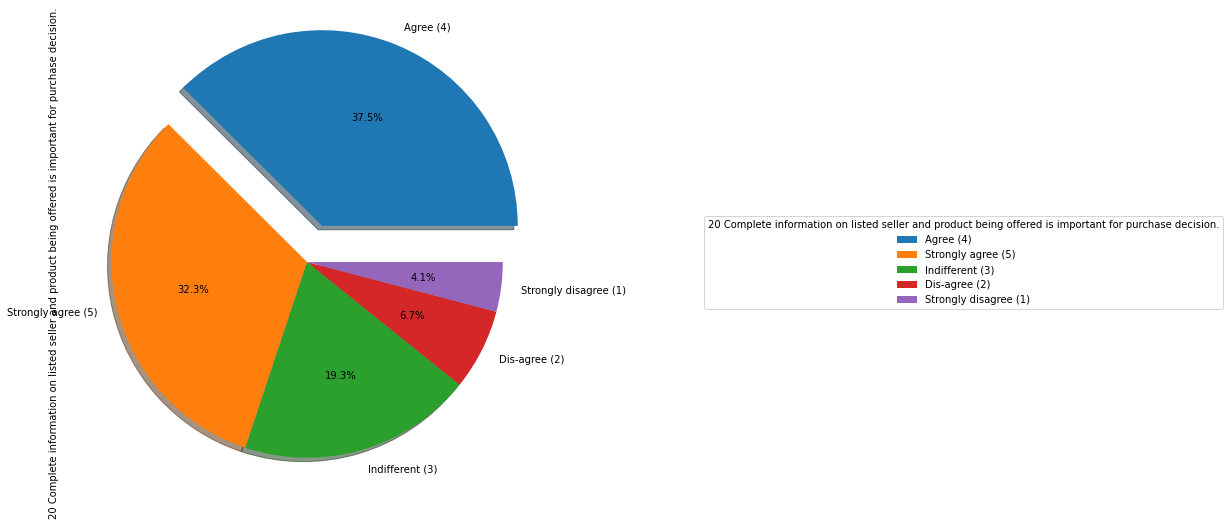




21 All relevant information on listed products must be stated clearly


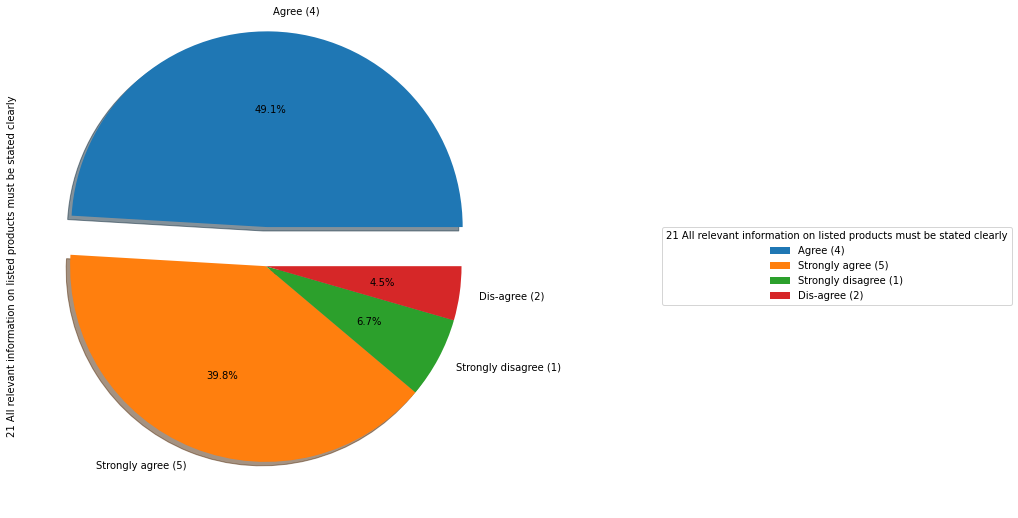




22 Ease of navigation in website


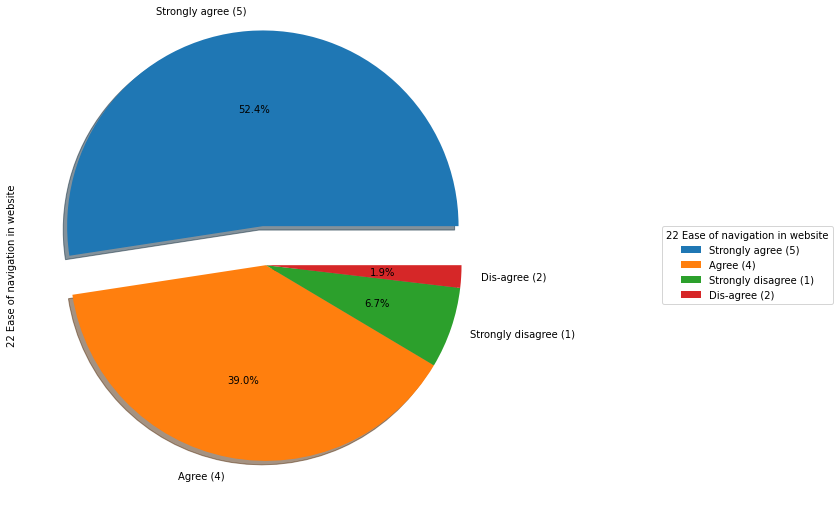




23 Loading and processing speed


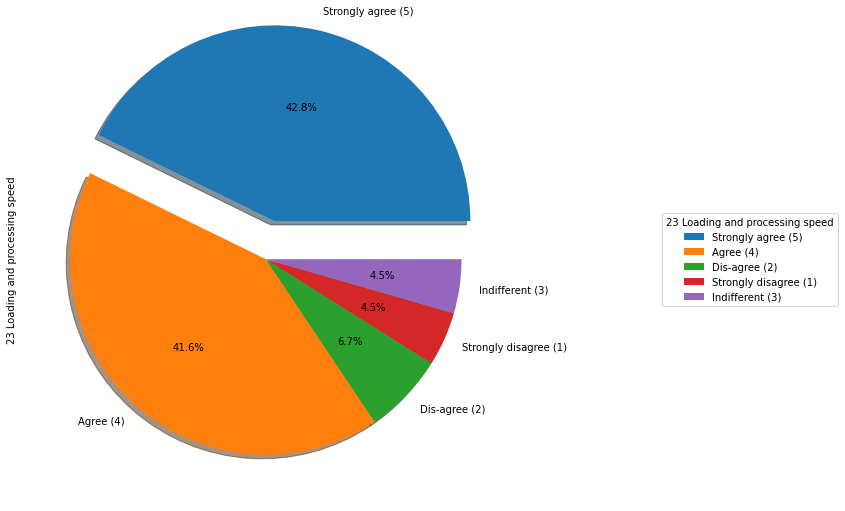




24 User friendly Interface of the website


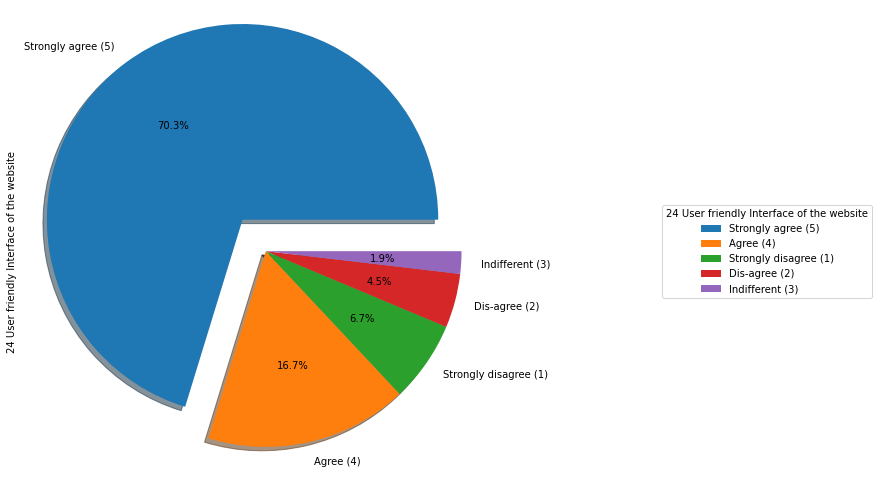




25 Convenient Payment methods


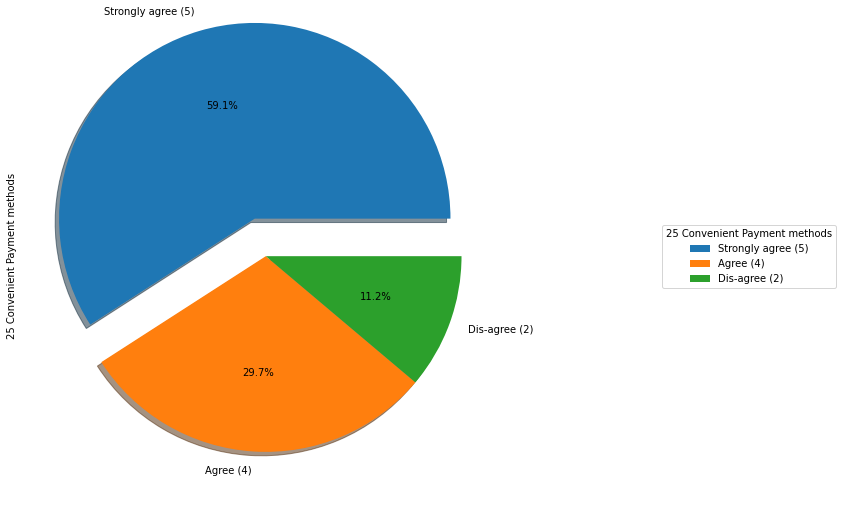




26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time


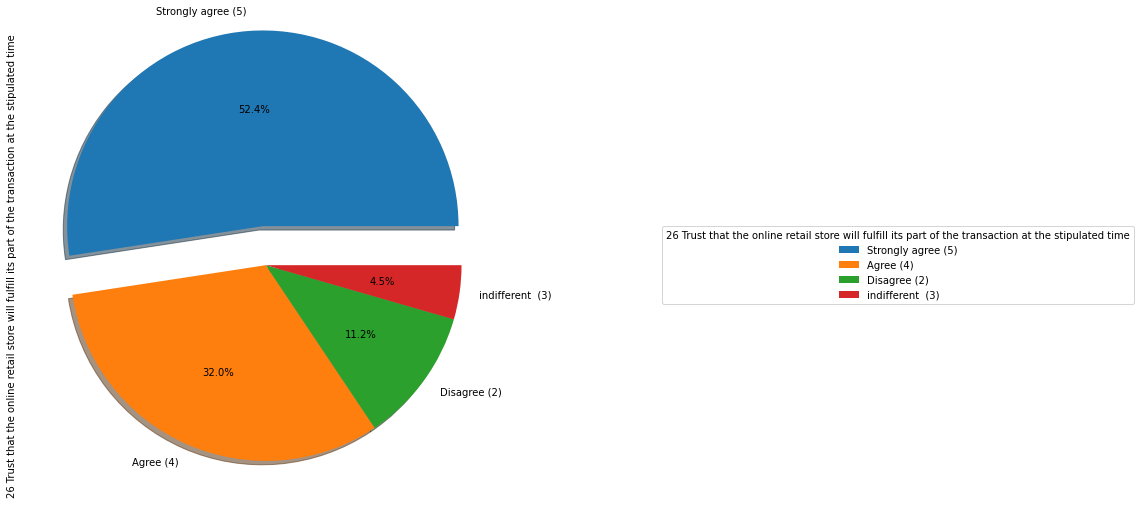




27 Empathy (readiness to assist with queries) towards the customers


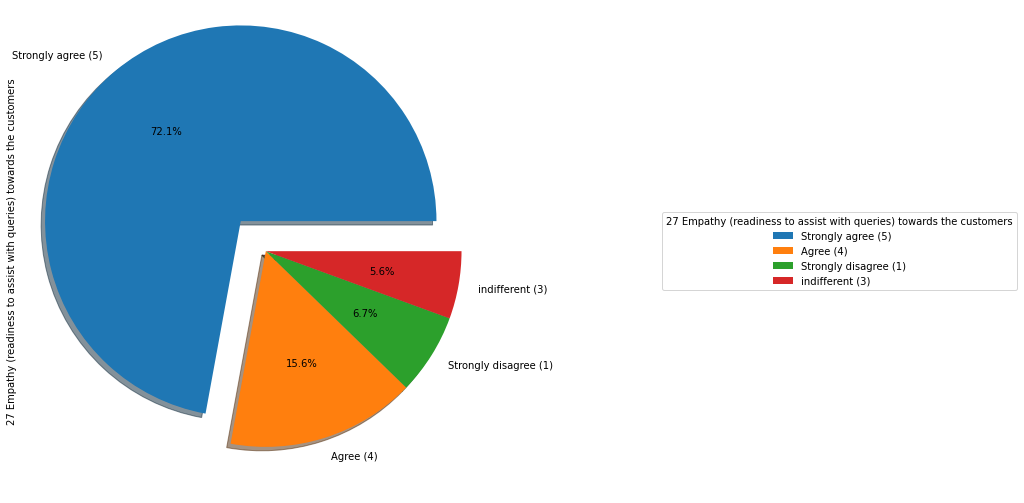




28 Being able to guarantee the privacy of the customer


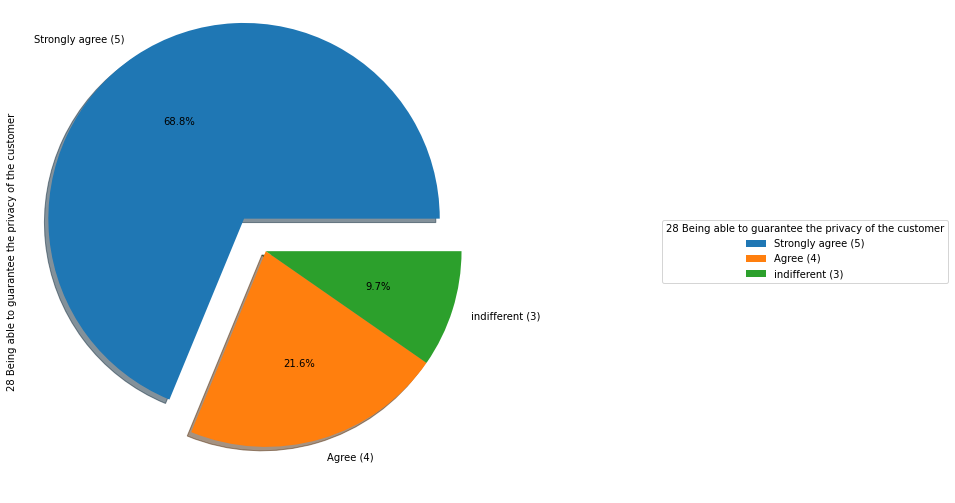




29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)


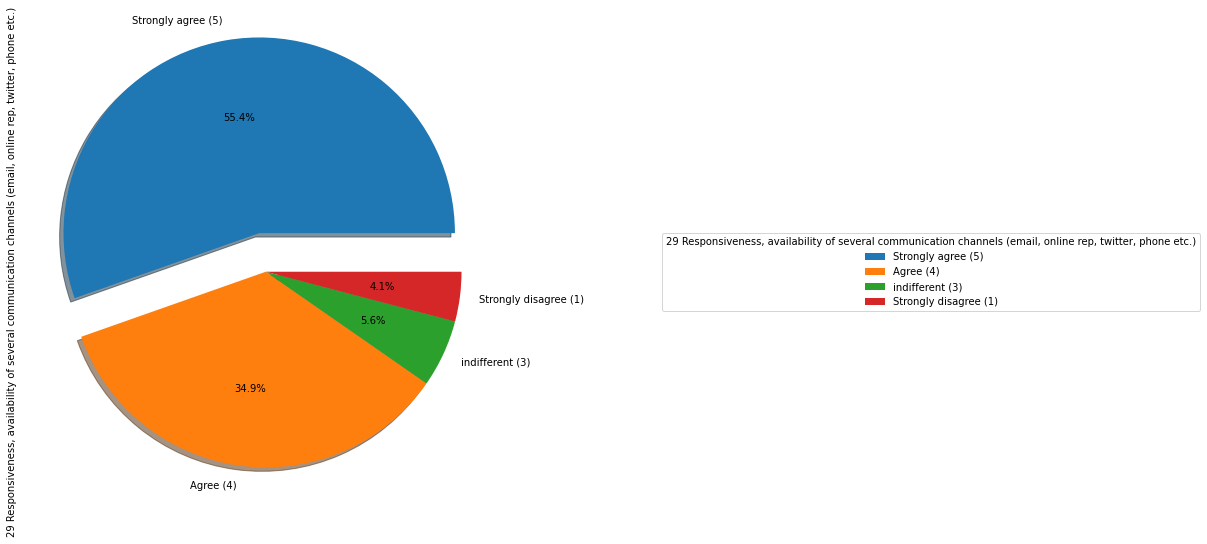




30 Online shopping gives monetary benefit and discounts


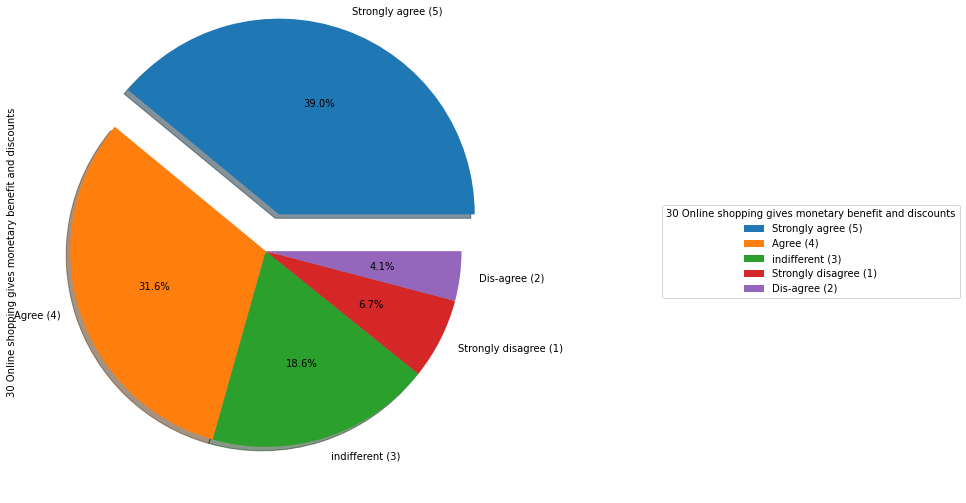




31 Enjoyment is derived from shopping online


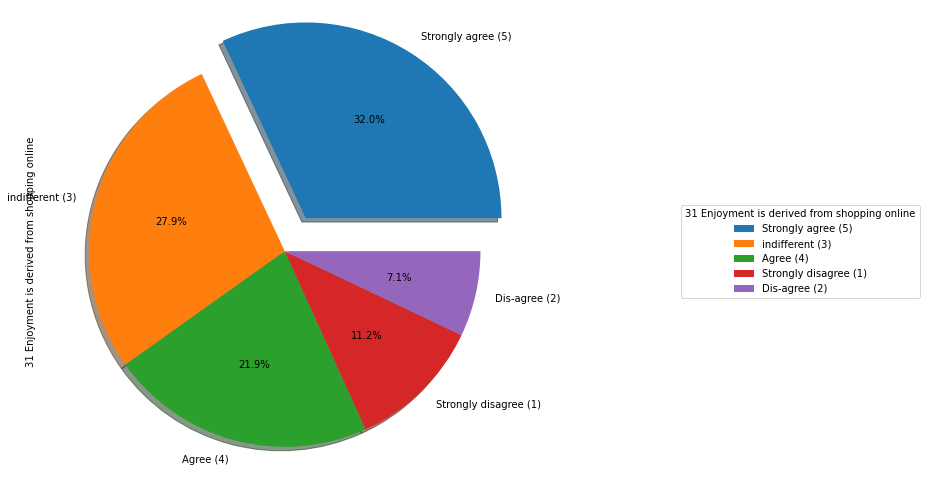




32 Shopping online is convenient and flexible


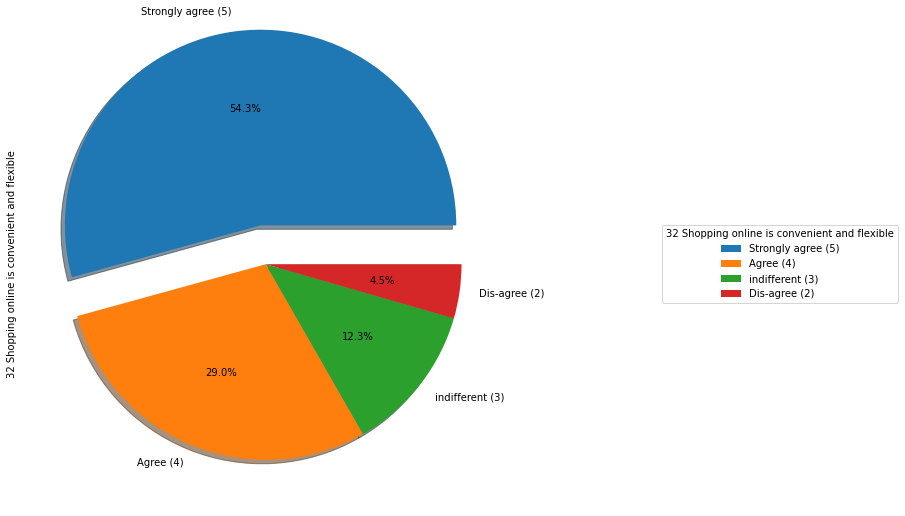




33 Return and replacement policy of the e-tailer is important for purchase decision


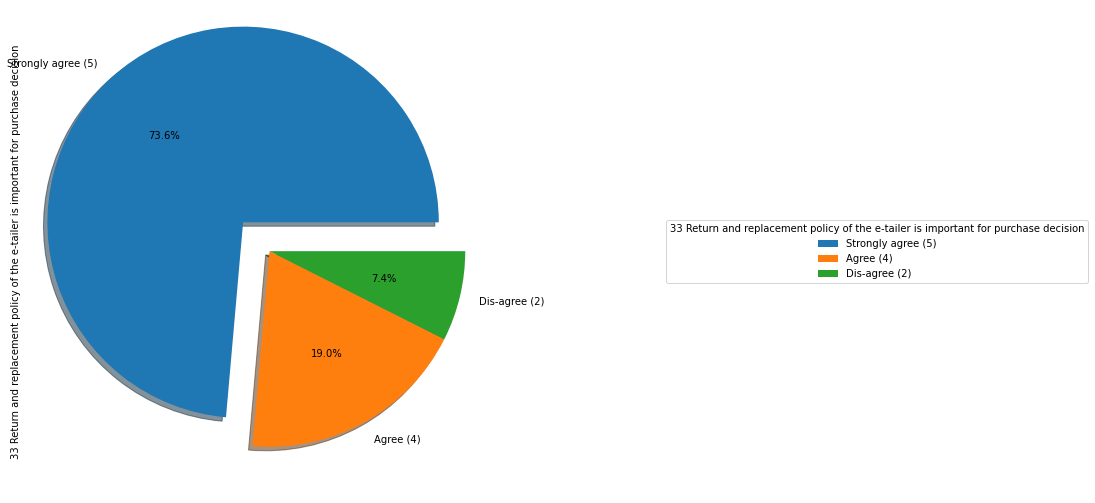




34 Gaining access to loyalty programs is a benefit of shopping online


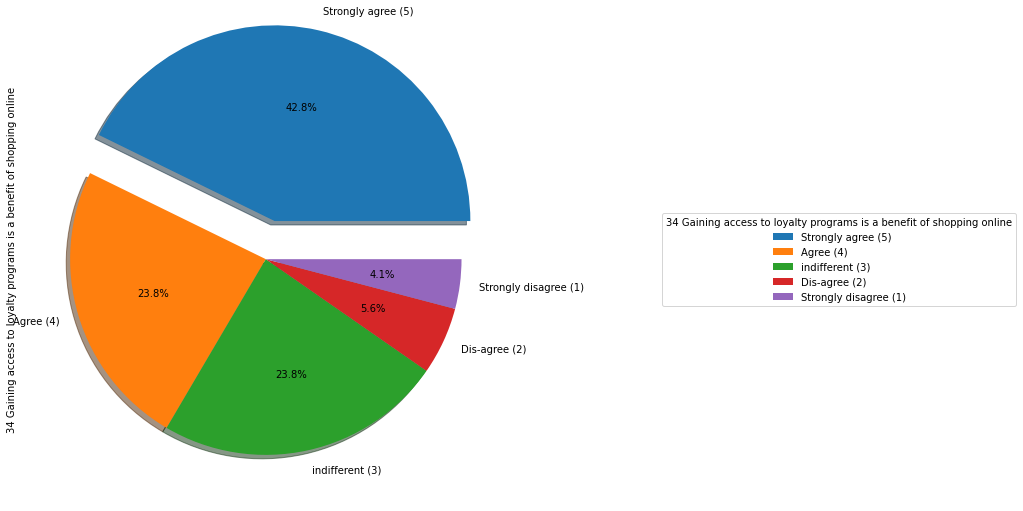




35 Displaying quality Information on the website improves satisfaction of customers


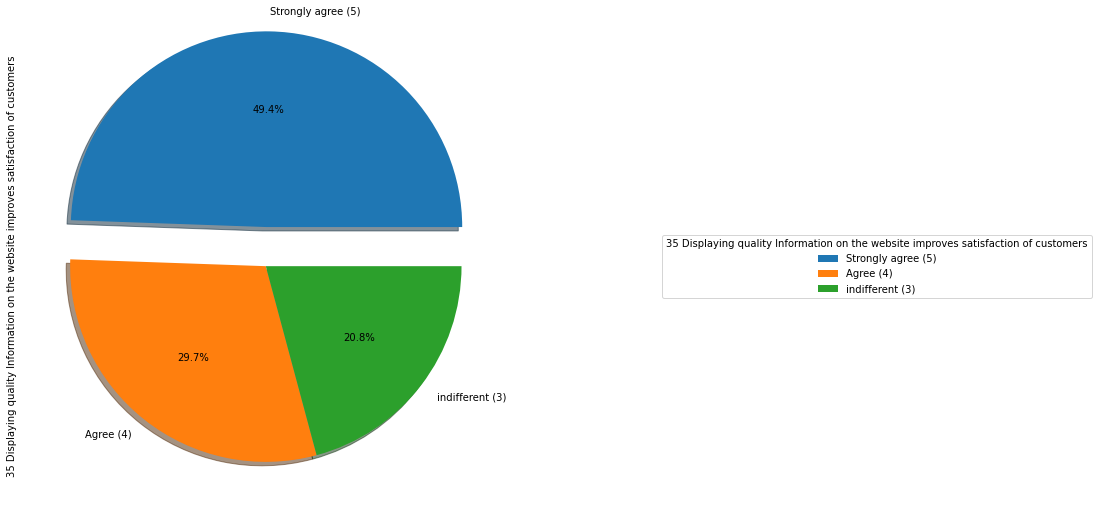




36 User derive satisfaction while shopping on a good quality website or application


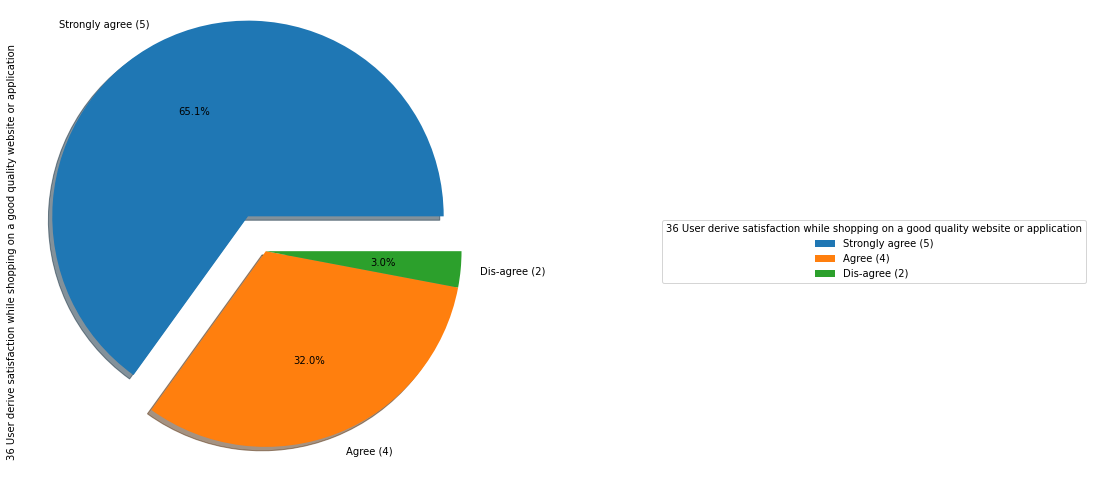




37 Net Benefit derived from shopping online can lead to users satisfaction


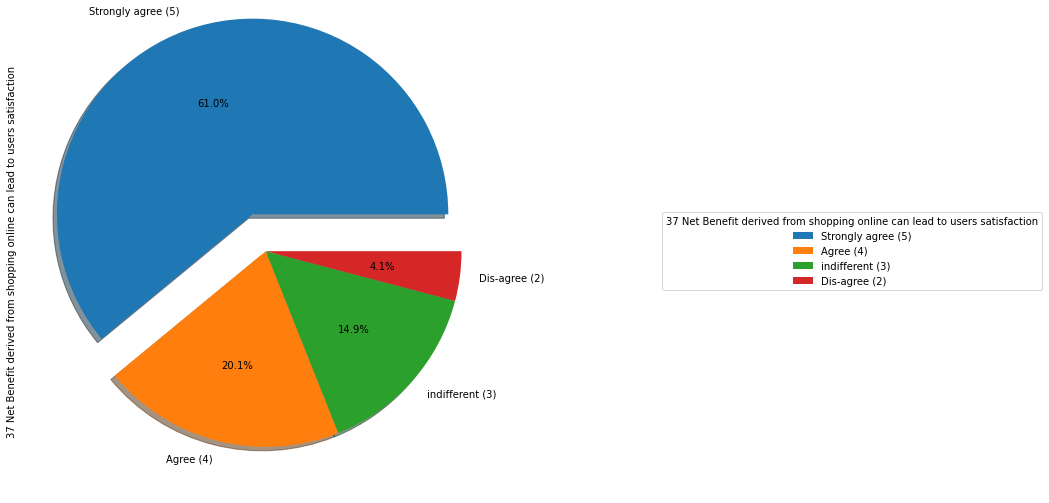




38 User satisfaction cannot exist without trust


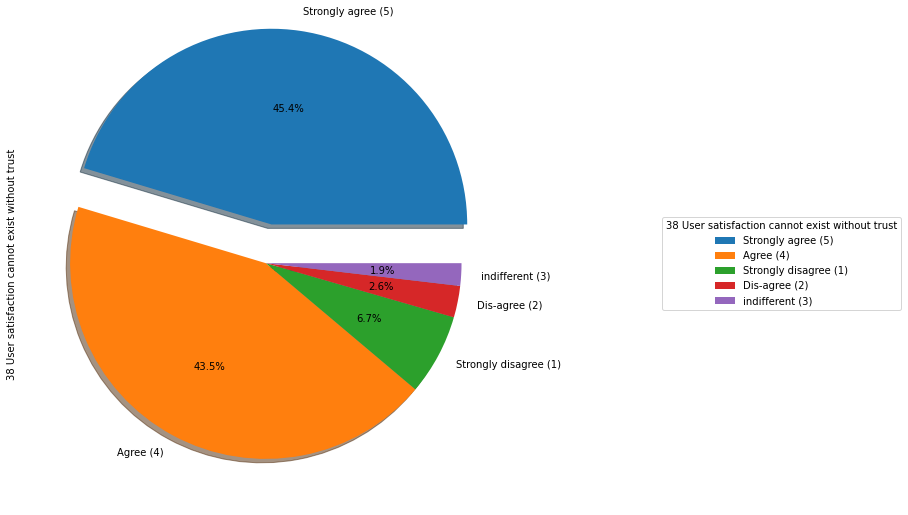




39 Offering a wide variety of listed product in several category


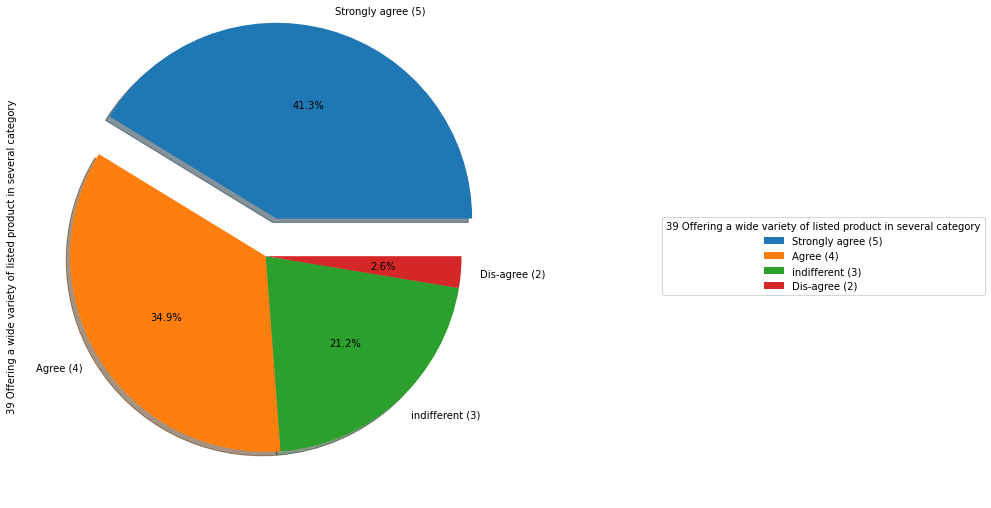




40 Provision of complete and relevant product information


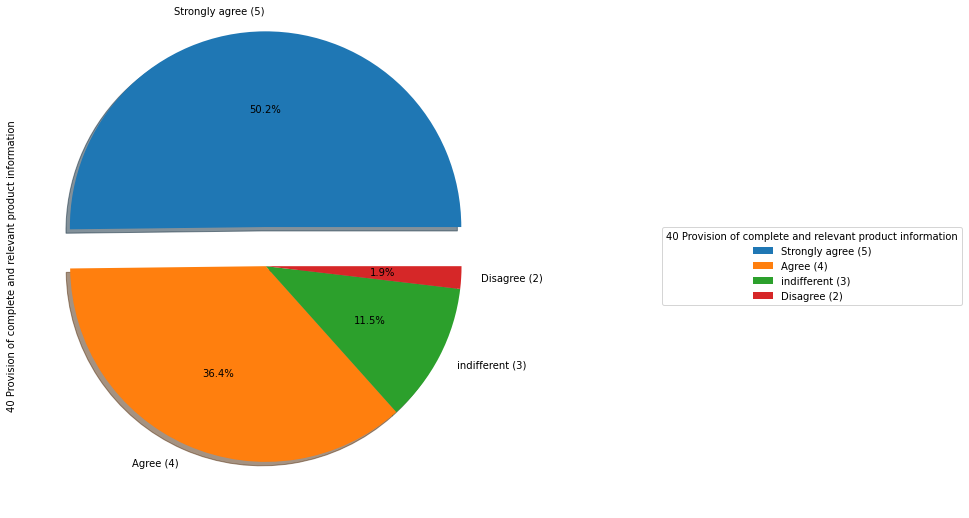




41 Monetary savings


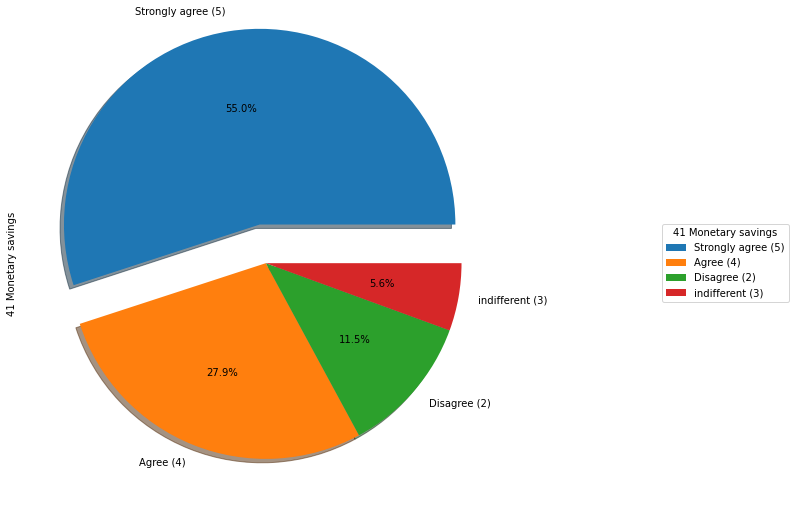




42 The Convenience of patronizing the online retailer


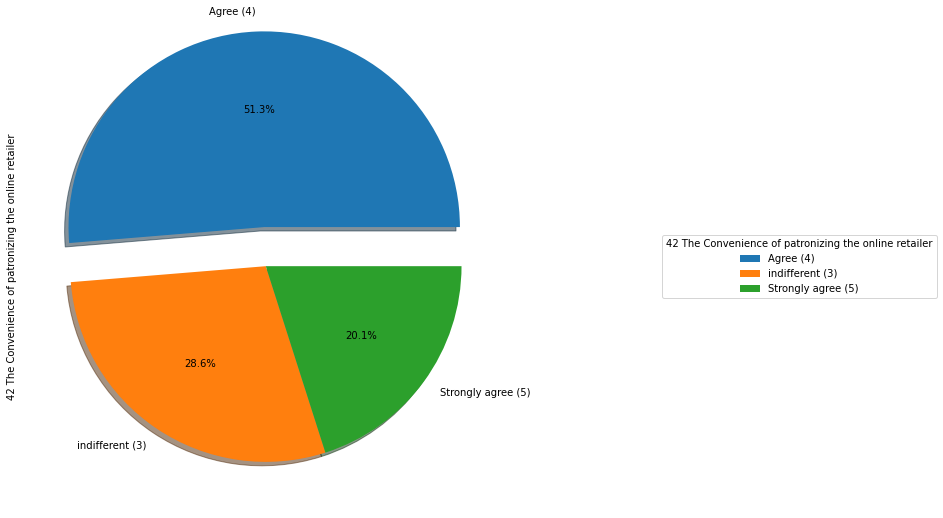




43 Shopping on the website gives you the sense of adventure


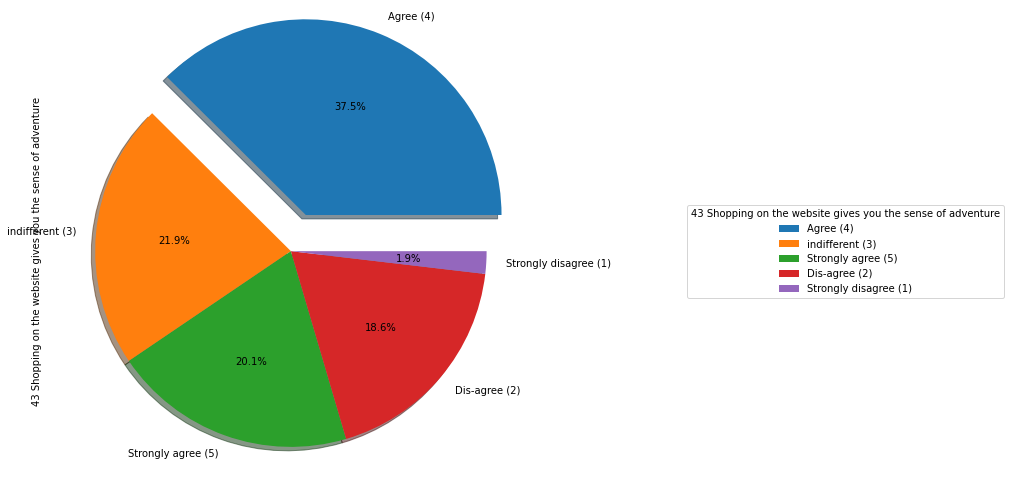




44 Shopping on your preferred e-tailer enhances your social status


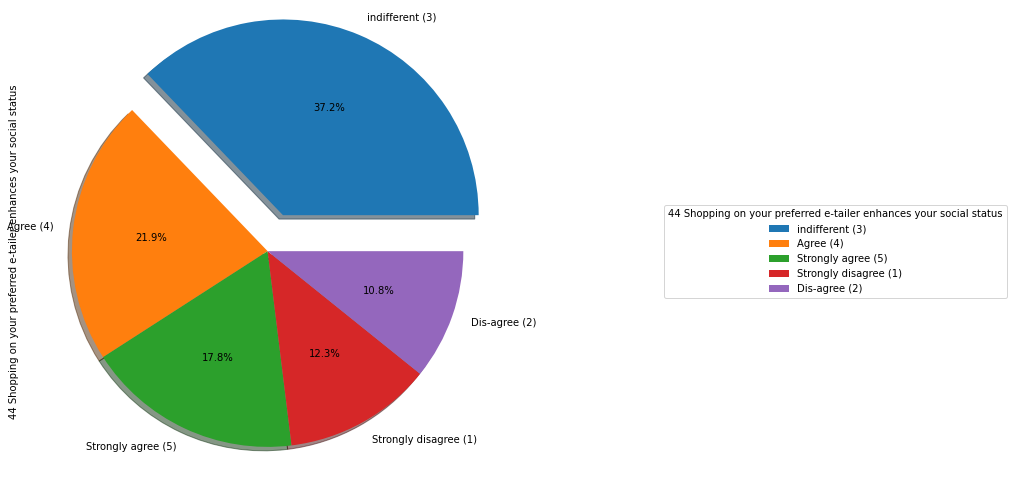




45 You feel gratification shopping on your favorite e-tailer


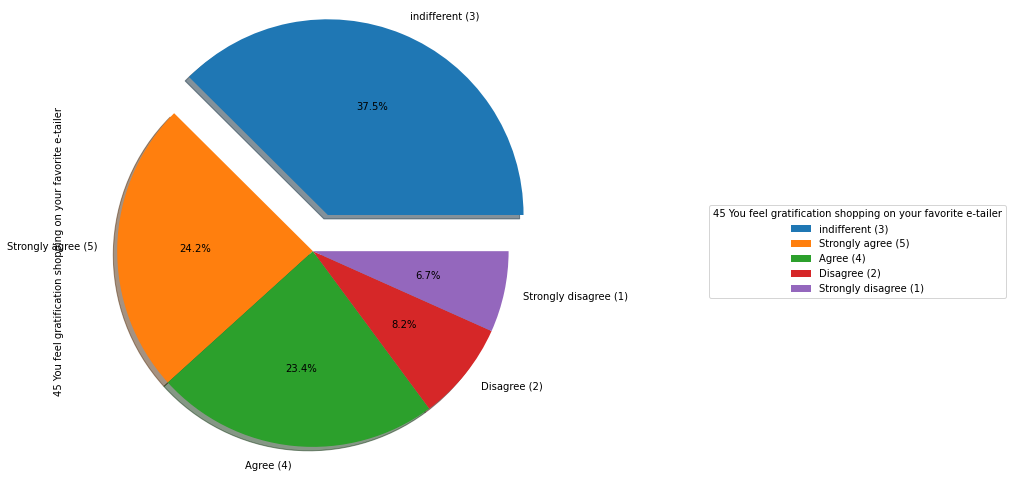




46 Shopping on the website helps you fulfill certain roles


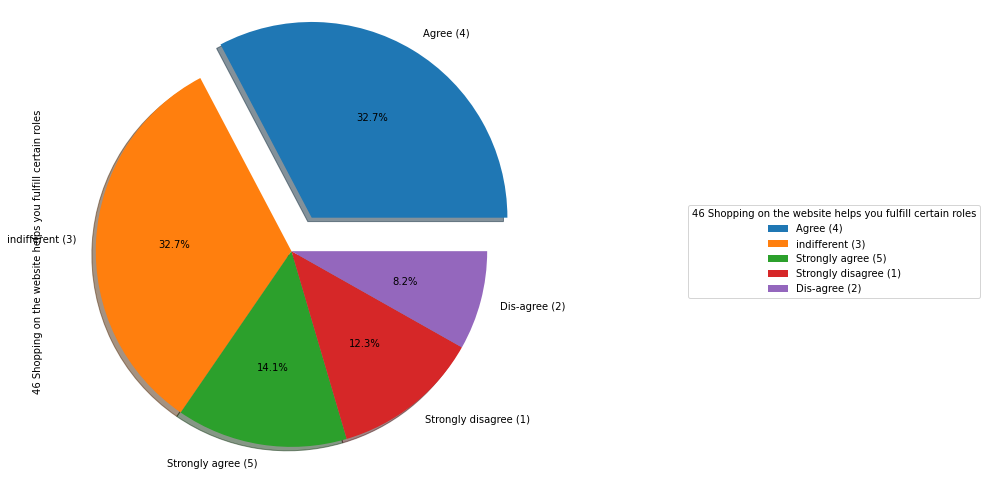




47 Getting value for money spent


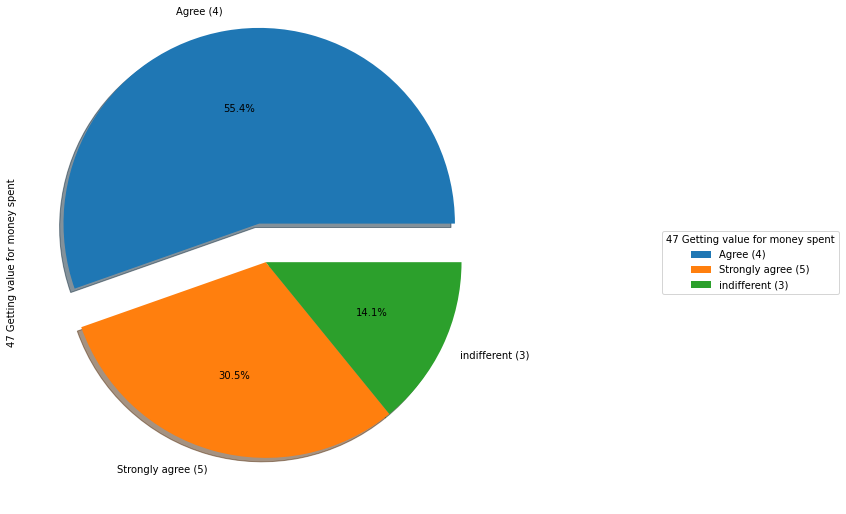




From the following, tick any (or all) of the online retailers you have shopped from;                                                                           


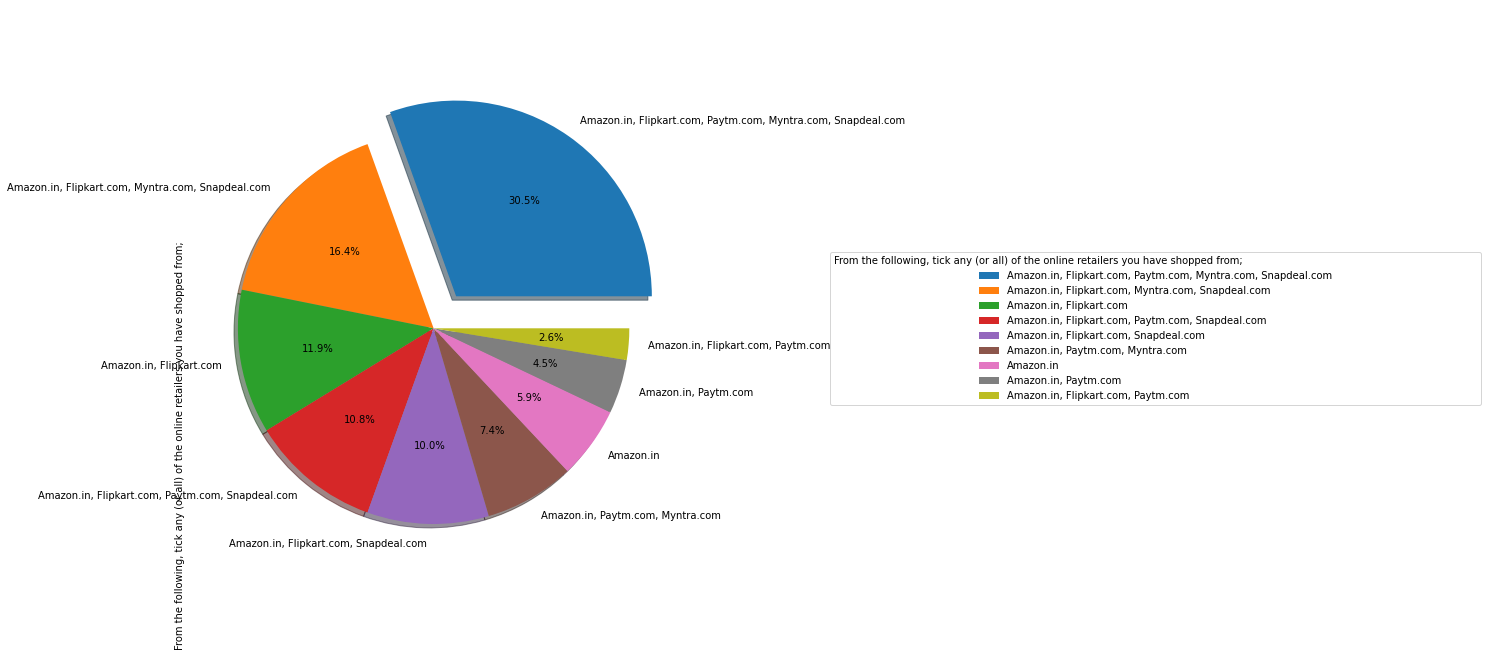




Easy to use website or application


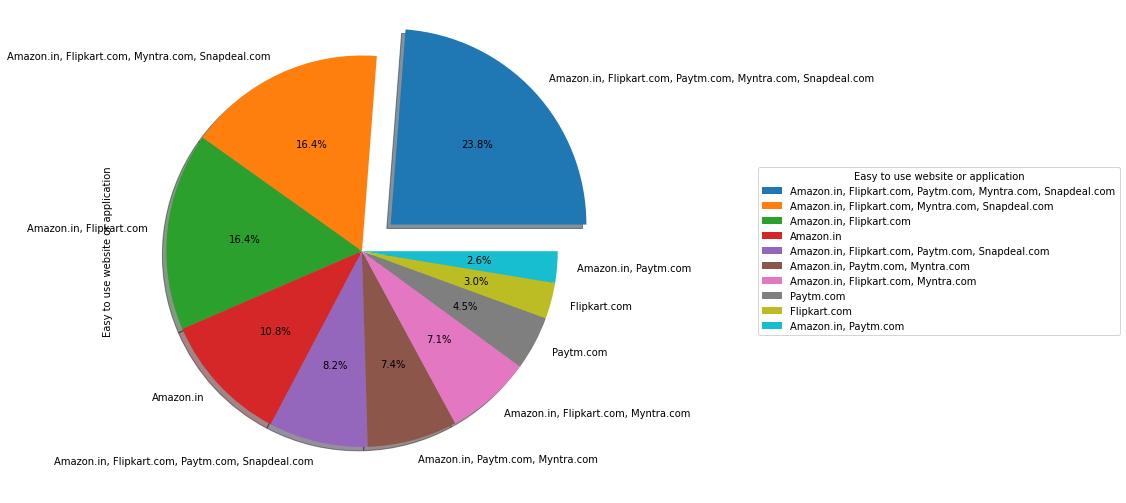




Visual appealing web-page layout


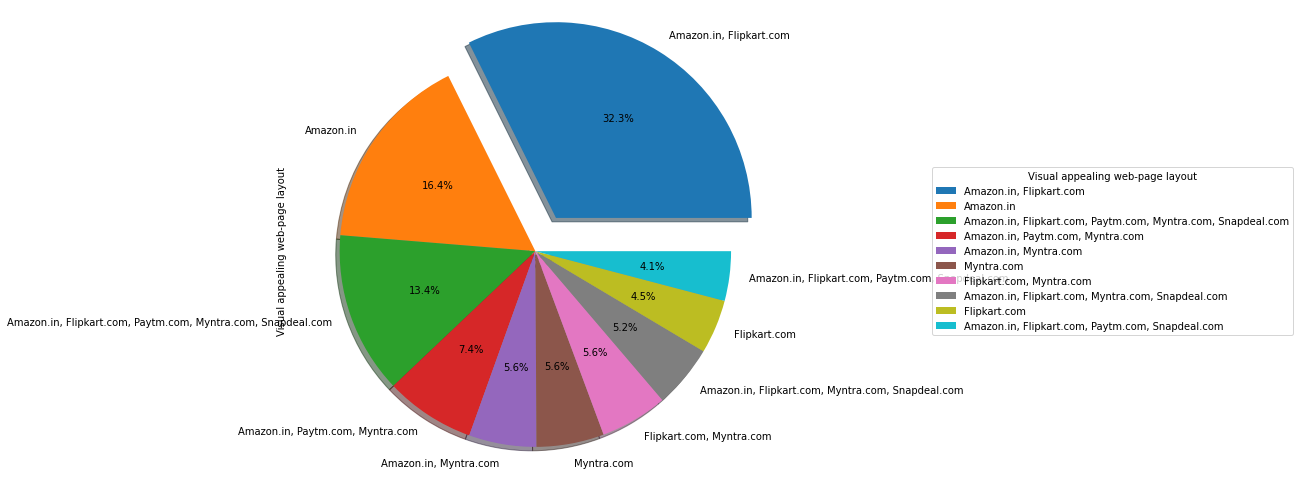




Wild variety of product on offer


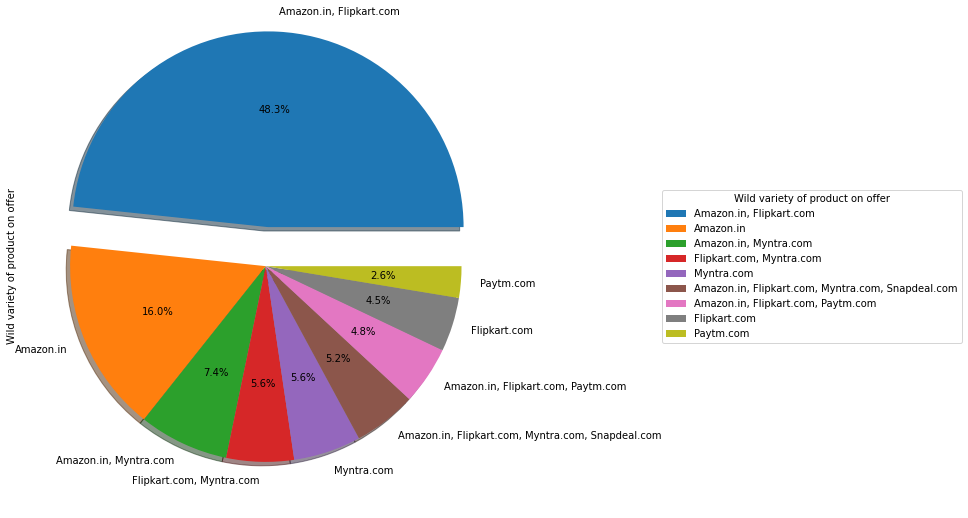




Complete, relevant description information of products


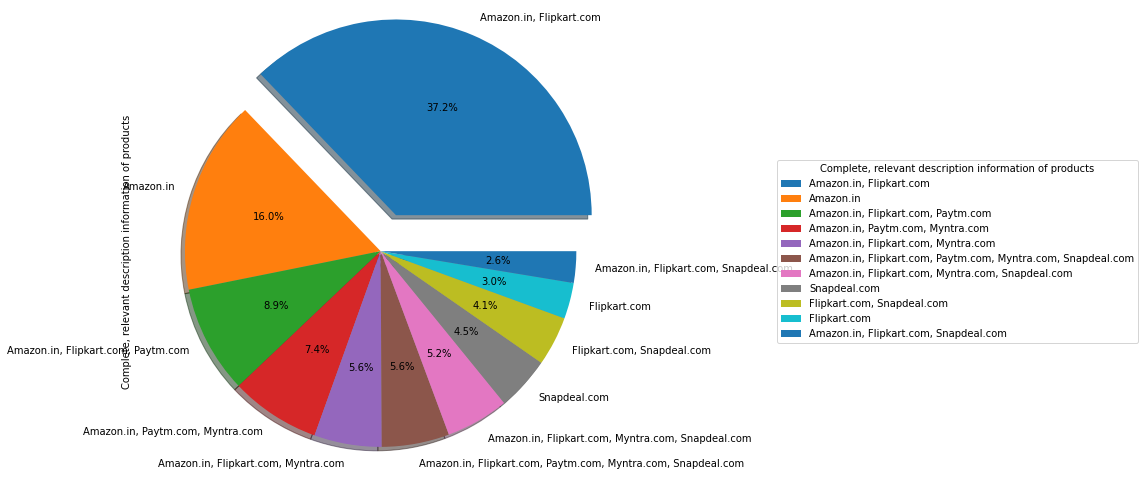




Fast loading website speed of website and application


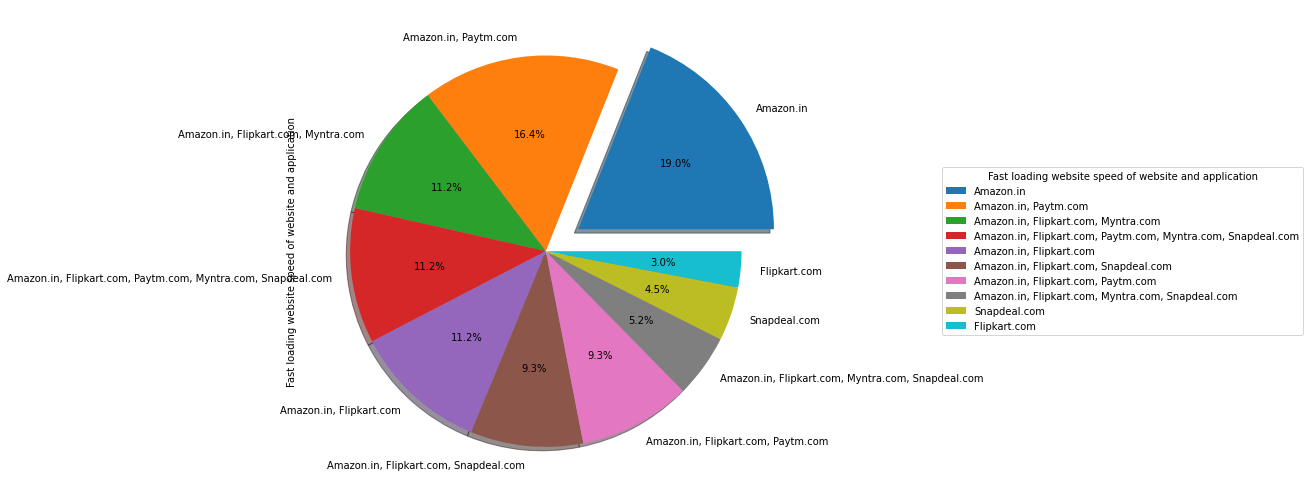




Reliability of the website or application


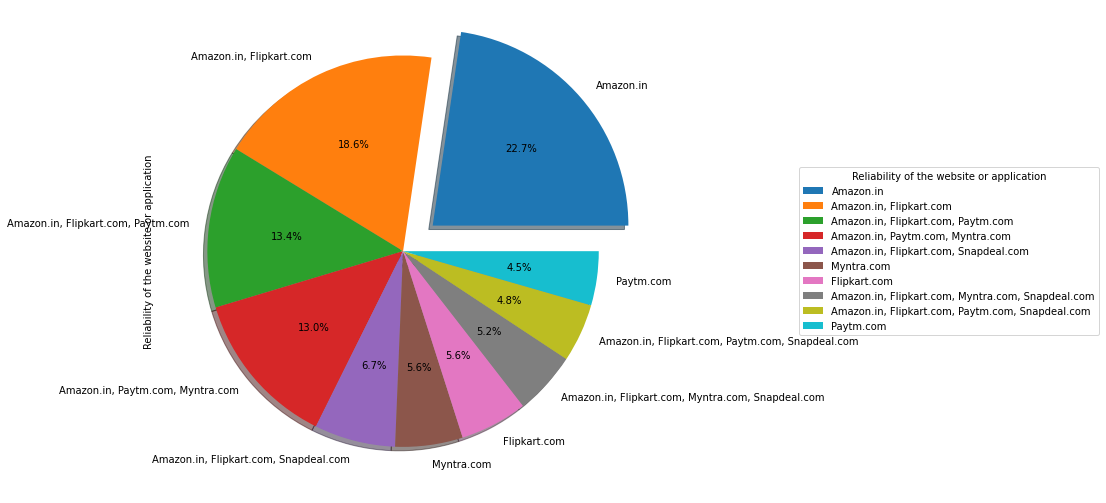




Quickness to complete purchase


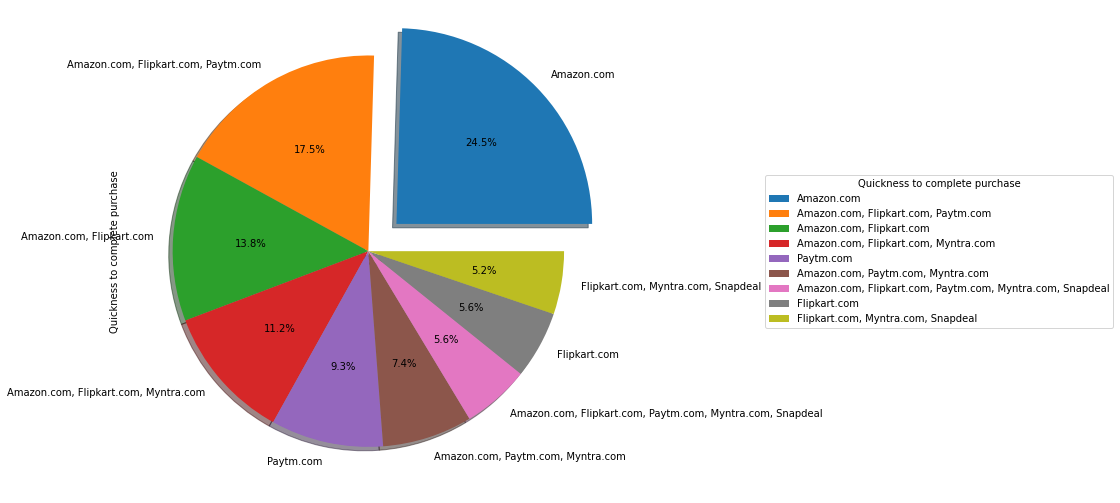




Availability of several payment options


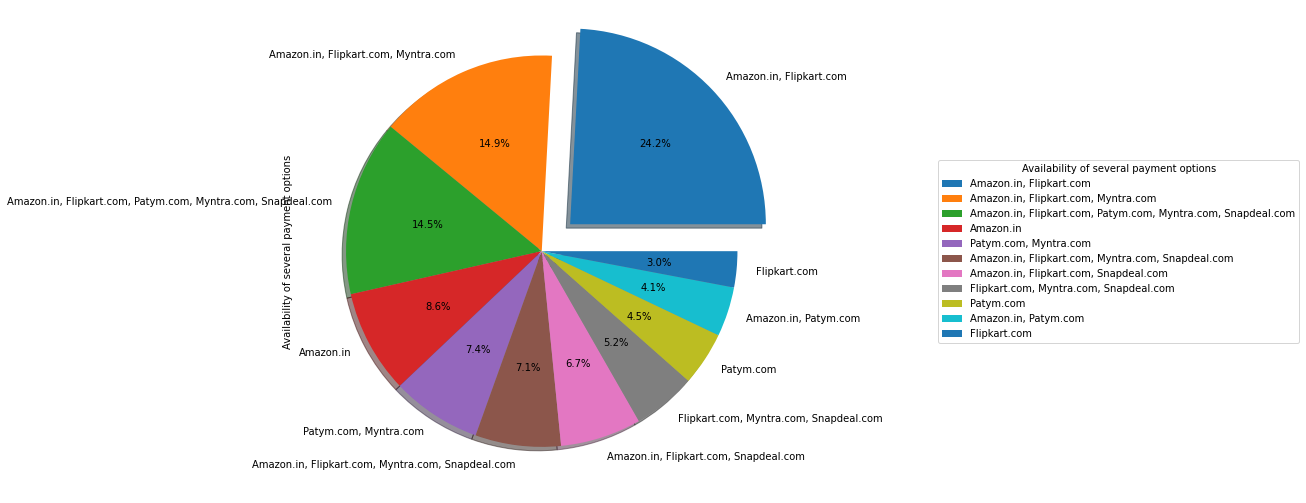




Speedy order delivery 


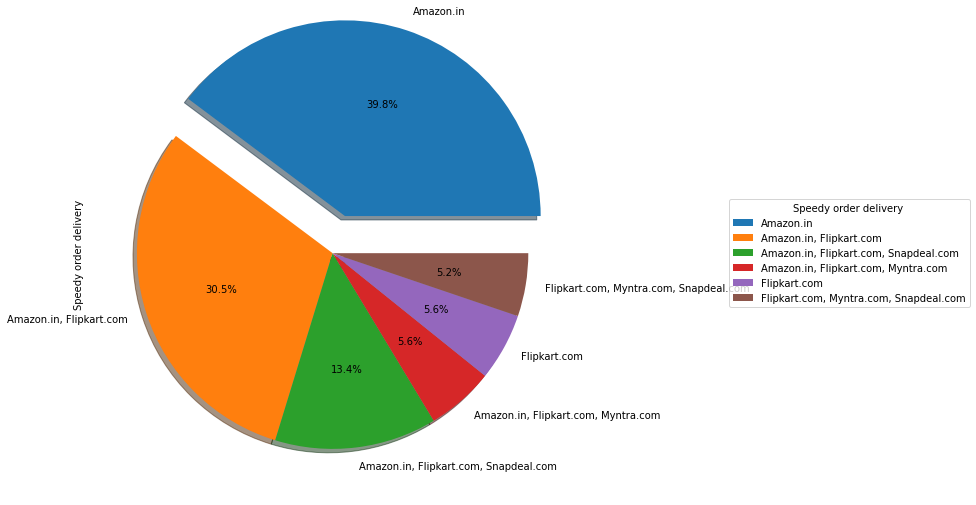




Privacy of customers’ information


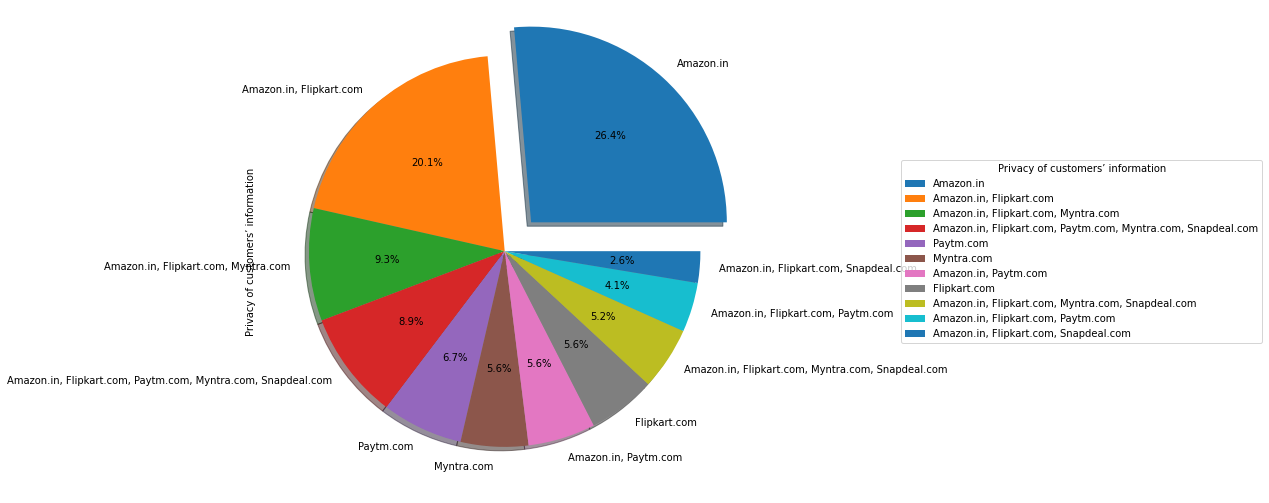




Security of customer financial information


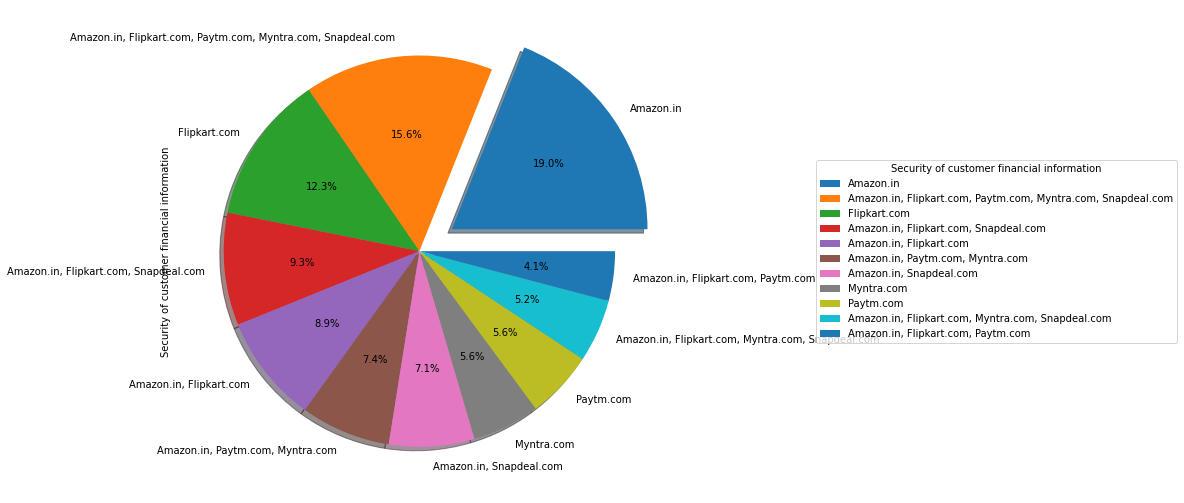




Perceived Trustworthiness





Presence of online assistance through multi-channel


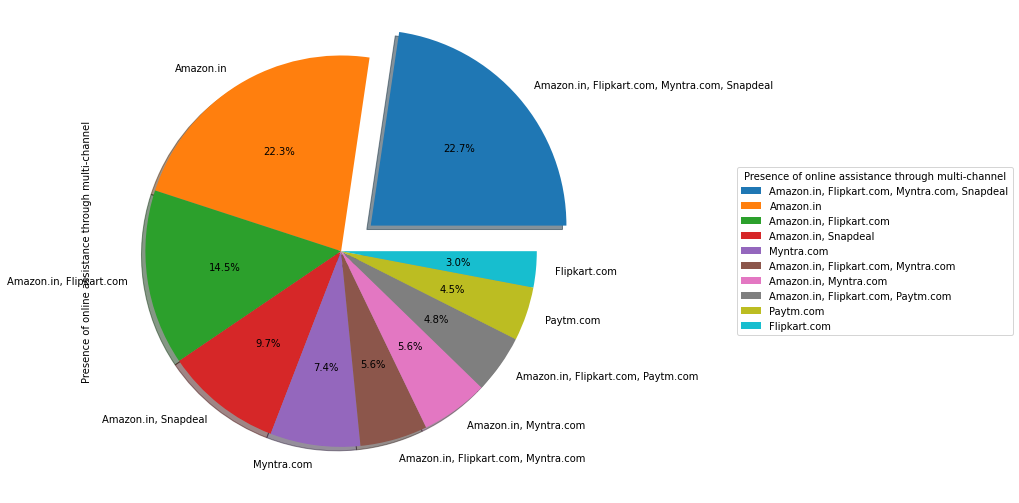




Longer time to get logged in (promotion, sales period)


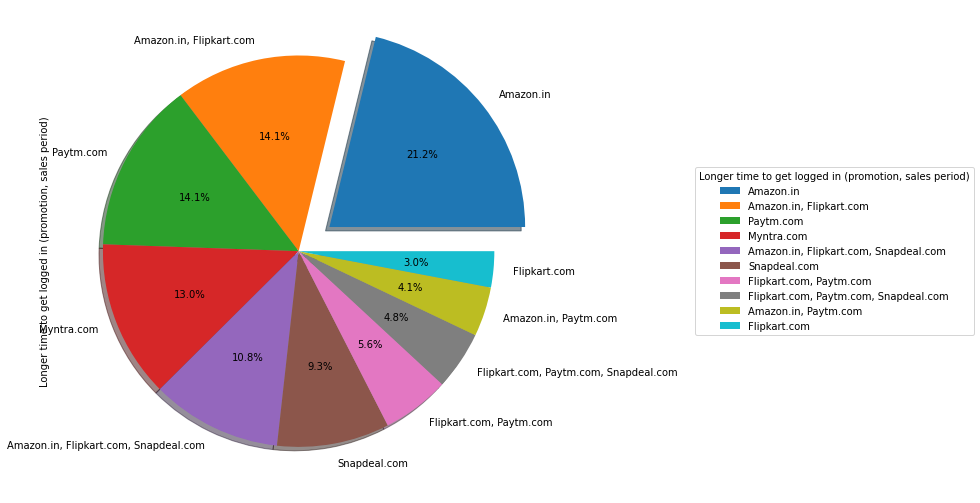




Longer time in displaying graphics and photos (promotion, sales period)





Late declaration of price (promotion, sales period)





Longer page loading time (promotion, sales period)





Limited mode of payment on most products (promotion, sales period)


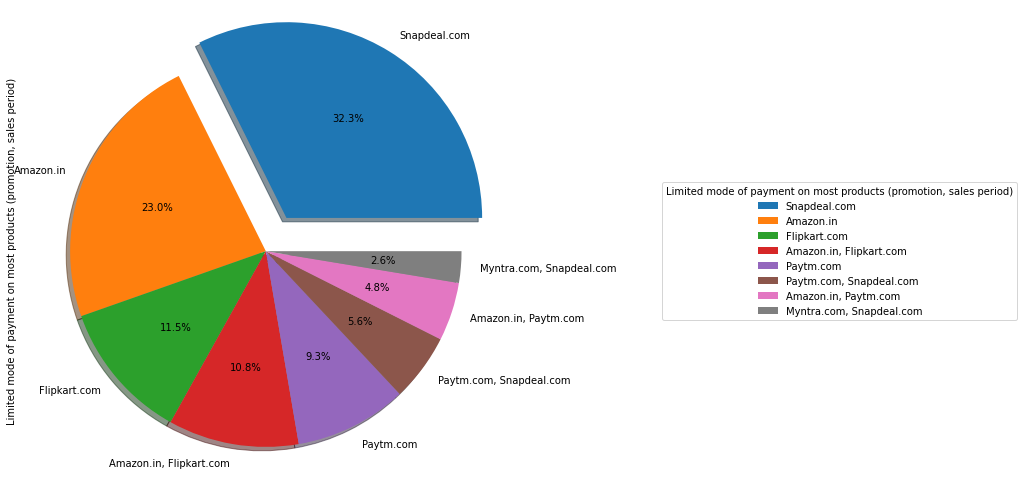




Longer delivery period


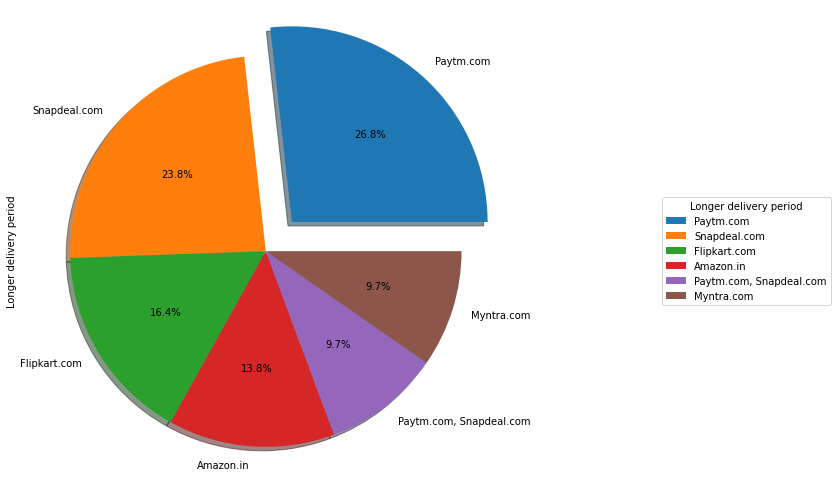




Change in website/Application design


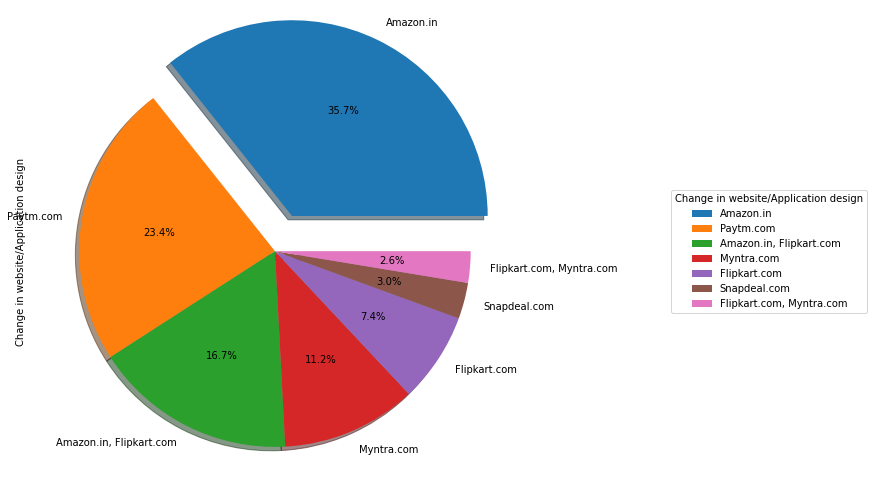




Frequent disruption when moving from one page to another


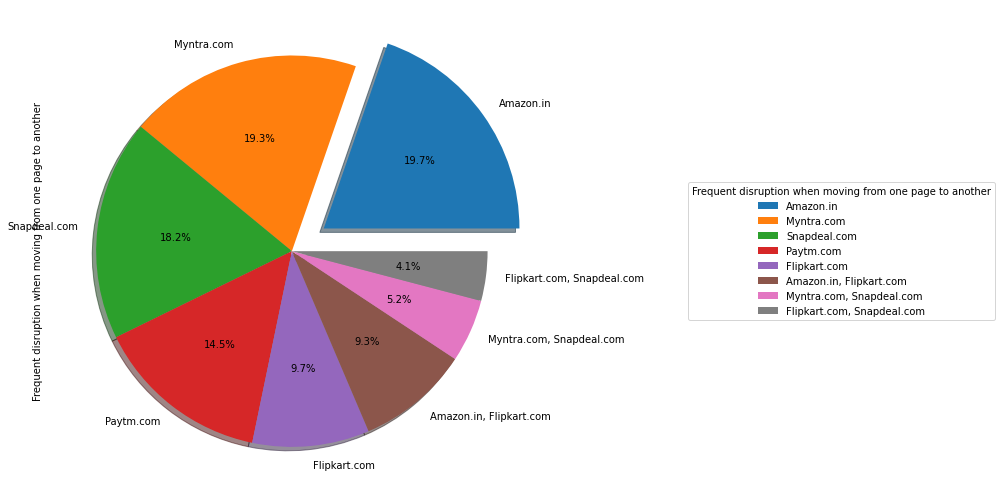




Website is as efficient as before


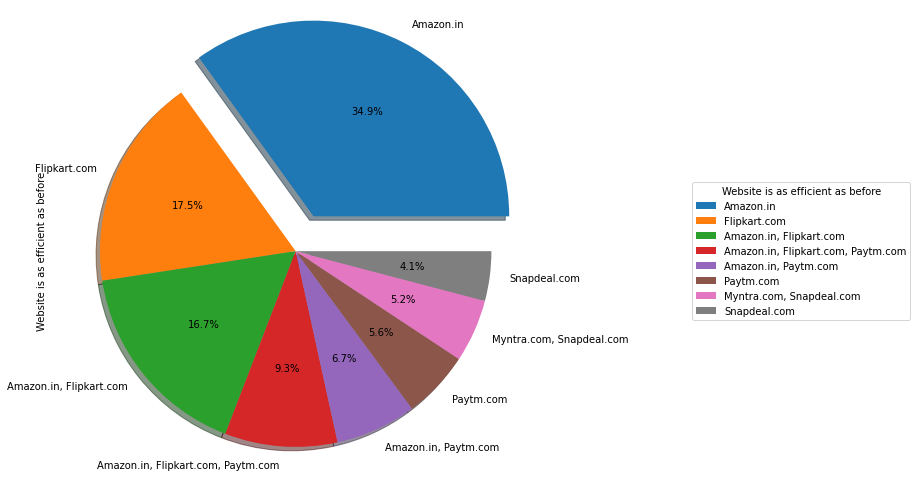




Which of the Indian online retailer would you recommend to a friend?


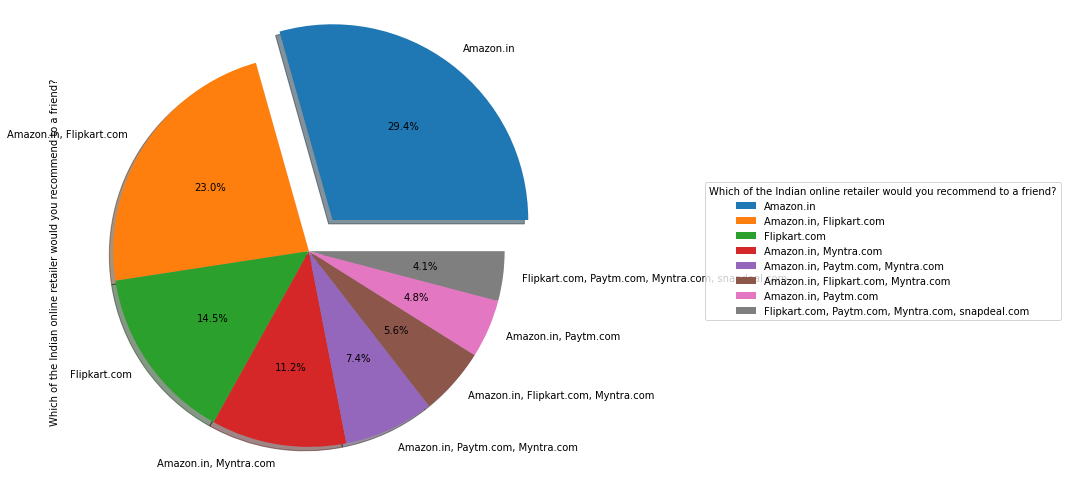

In [11]:
# pie plot for each and every column
for i in range(0,len(column)):
    l=column[i]
    print('\033[1m'+l+'\033[1m')
    y=cr_dataset[column[i]].value_counts()
    exp=[0.2]
    j=int(cr_dataset[column[i]].nunique())
    k=1
    while k < j:
        exp.append(0)
        k+=1
    z=y.plot.pie(figsize=(9,9),explode=exp, autopct='%2.1f%%', shadow=True)
    z.legend(title =column[i],loc ="center left",bbox_to_anchor =(1.3, 0, 0.5, 1))
    plt.show()
    print('\n\n')

    
    

In [12]:
#filtering of the columns based on visualized data
j=0
while j <=47:
    cr_dataset.drop(columns=[column[j]],inplace=True)
    j+=1
cr_dataset

Easy to use website or application  \
0                                            Paytm.com   
1    Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com   
2                     Amazon.in, Paytm.com, Myntra.com   
3    Amazon.in, Flipkart.com, Paytm.com, Myntra.com...   
4    Amazon.in, Flipkart.com, Paytm.com, Myntra.com...   
..                                                 ...   
264                                          Amazon.in   
265                                       Flipkart.com   
266                                          Amazon.in   
267  Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com   
268                                          Amazon.in   

                      Visual appealing web-page layout  \
0                                         Flipkart.com   
1                                Amazon.in, Myntra.com   
2                     Amazon.in, Paytm.com, Myntra.com   
3    Amazon.in, Flipkart.com, Paytm.com, Myntra.com...   
4                                           Myntra.com   
..                                                 ...   
264                                          Amazon.in   
265                                          Amazon.in   
266                                          Amazon.in   
267  Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com   
268                                          Amazon.in   

                      Wild variety of product on offer  \
0                                         Flipkart.com   
1                             Flipkart.com, Myntra.com   
2                                Amazon.in, Myntra.com   
3                              Amazon.in, Flipkart.com   
4                                           Myntra.com   
..                                                 ...   
264                                          Amazon.in   
265                                          Amazon.in   
266                                          Amazon.in   
267  Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com   
268                                          Amazon.in   

    Complete, relevant description information of products  \
0                                         Snapdeal.com       
1                  Amazon.in, Flipkart.com, Myntra.com       
2                     Amazon.in, Paytm.com, Myntra.com       
3                              Amazon.in, Flipkart.com       
4    Amazon.in, Flipkart.com, Paytm.com, Myntra.com...       
..                                                 ...       
264                                          Amazon.in       
265                                       Flipkart.com       
266                                          Amazon.in       
267  Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com       
268                                          Amazon.in       

    Fast loading website speed of website and application  \
0                                         Snapdeal.com      
1                  Amazon.in, Flipkart.com, Myntra.com      
2                                 Amazon.in, Paytm.com      
3                Amazon.in, Flipkart.com, Snapdeal.com      
4                                            Amazon.in      
..                                                 ...      
264                                          Amazon.in      
265                                       Flipkart.com      
266                                          Amazon.in      
267  Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com      
268                                          Amazon.in      

             Reliability of the website or application  \
0                                            Paytm.com   
1                                           Myntra.com   
2                     Amazon.in, Paytm.com, Myntra.com   
3                   Amazon.in, Flipkart.com, Paytm.com   
4                     Amazon.in, Paytm.com, Myntra.com   
..                                                 ...   
264                                          

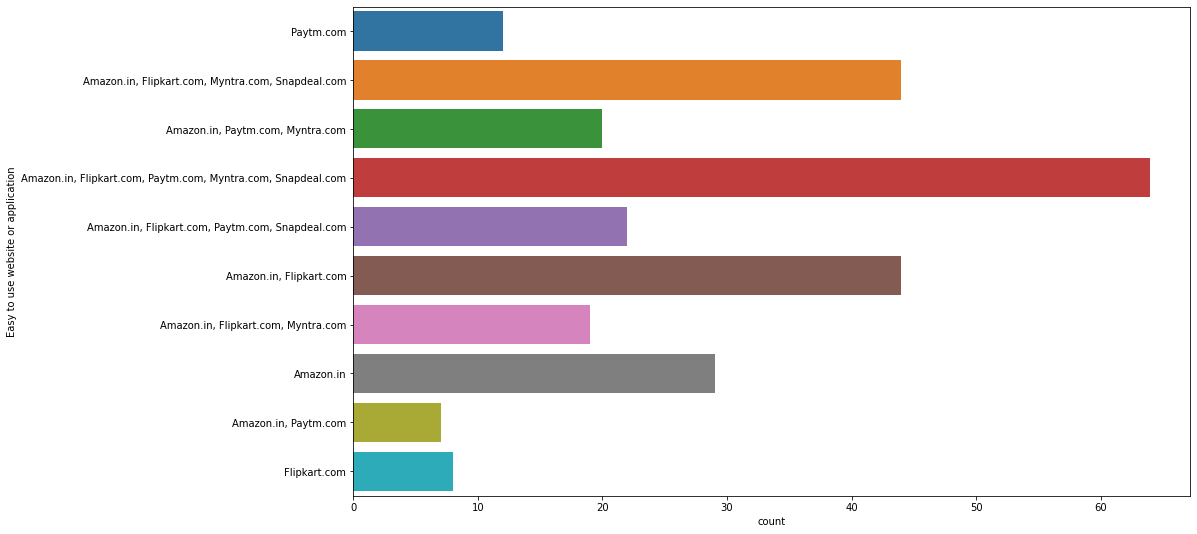

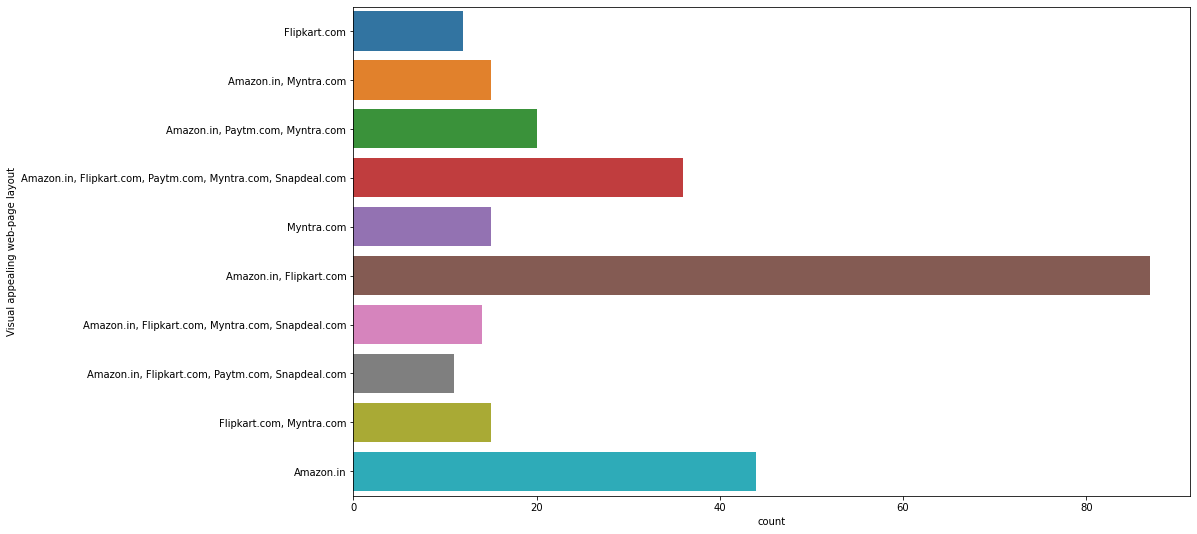

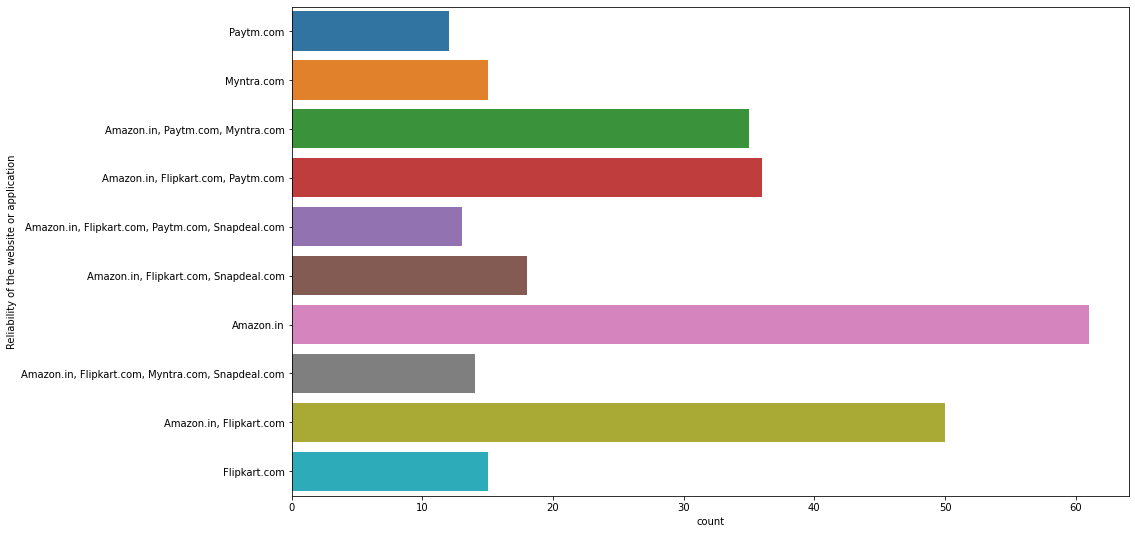

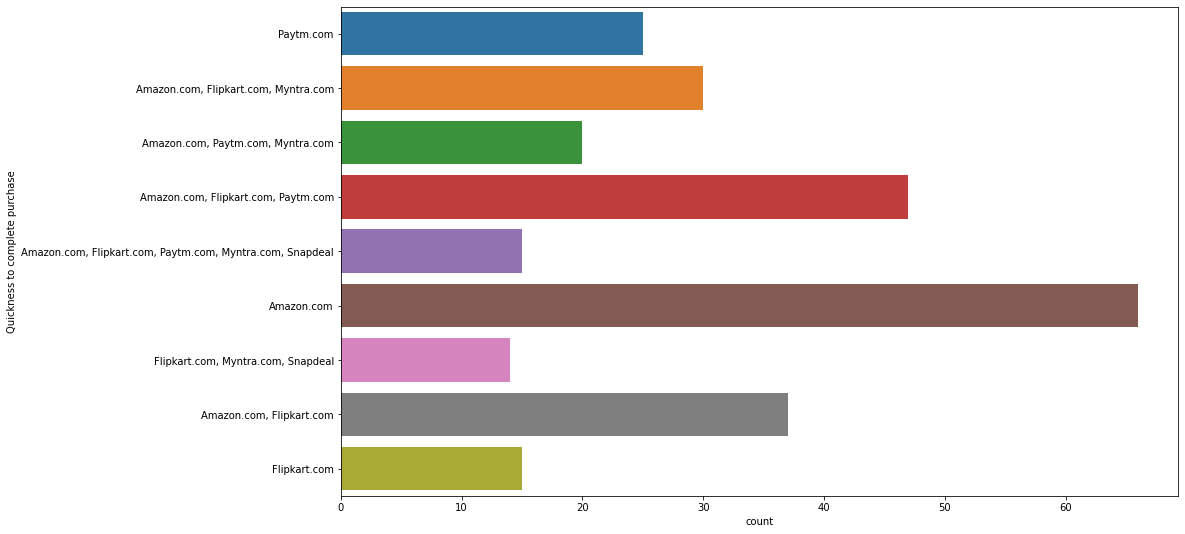

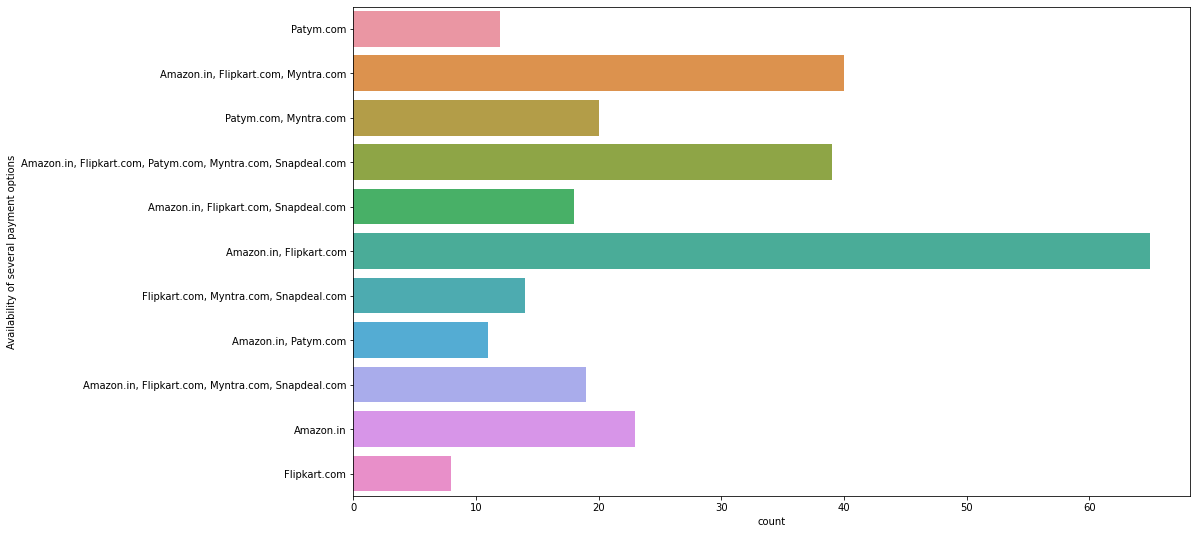

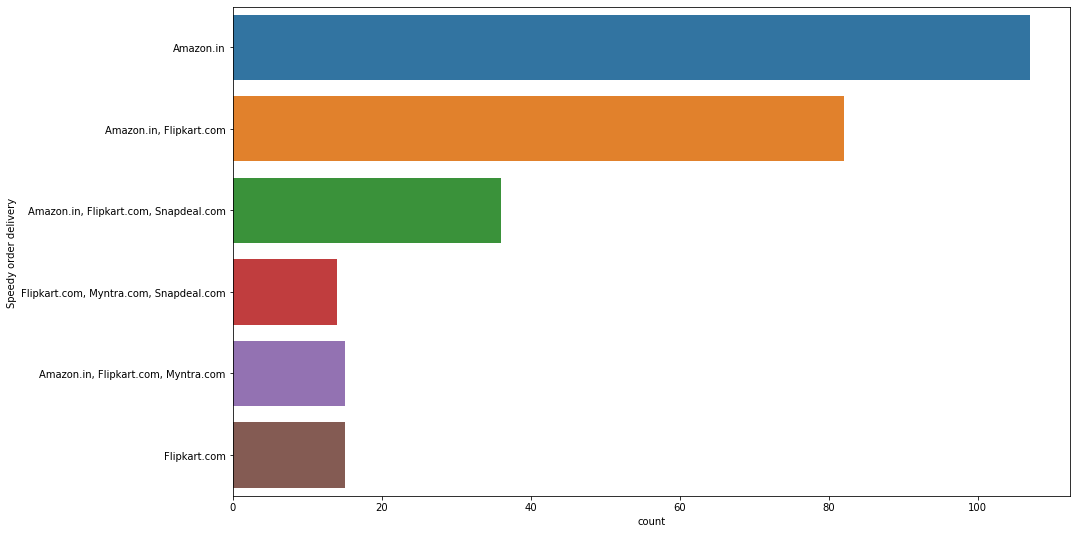

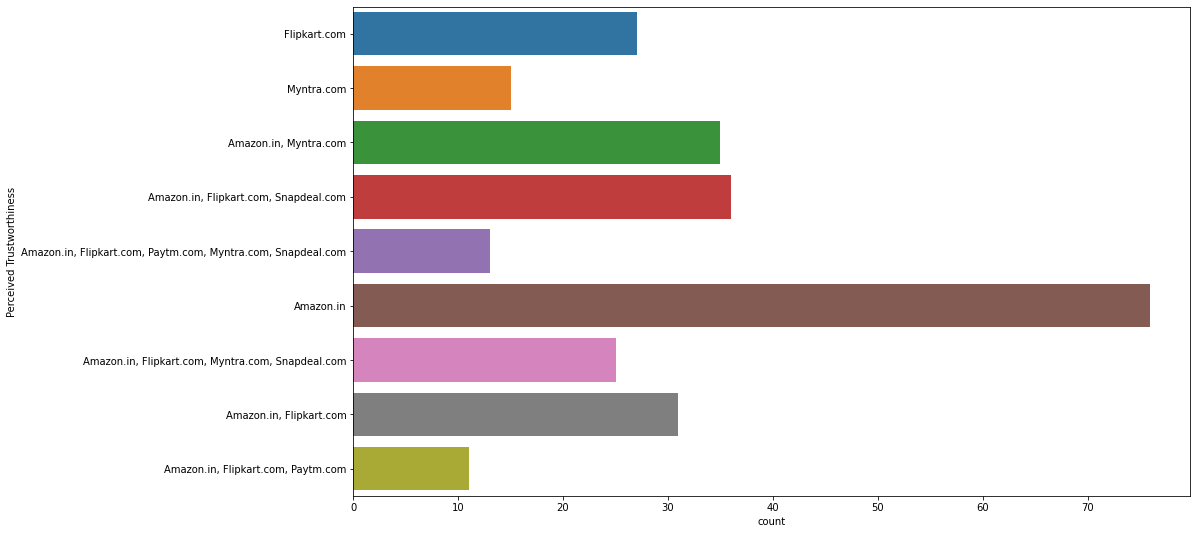

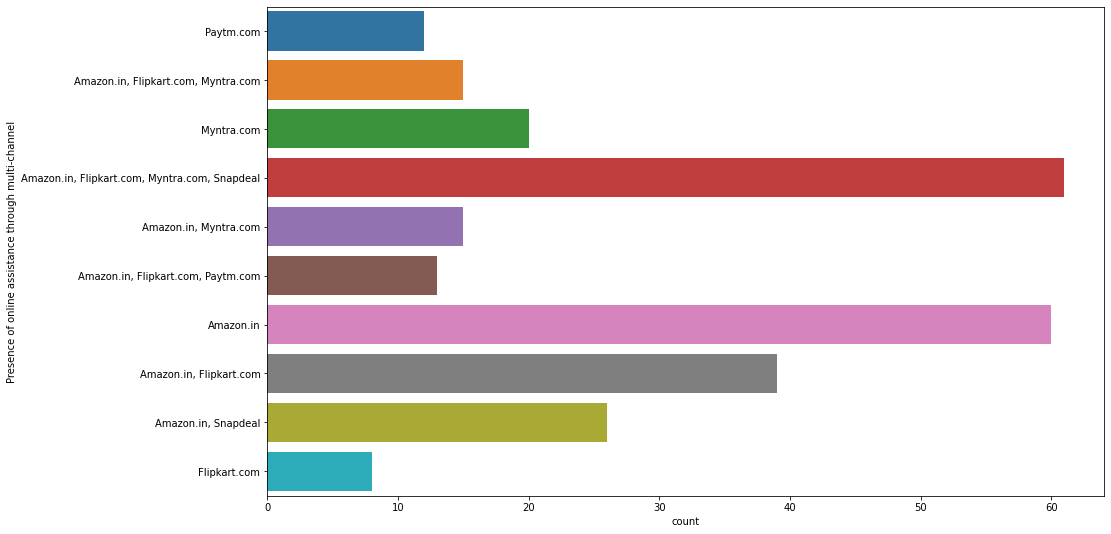

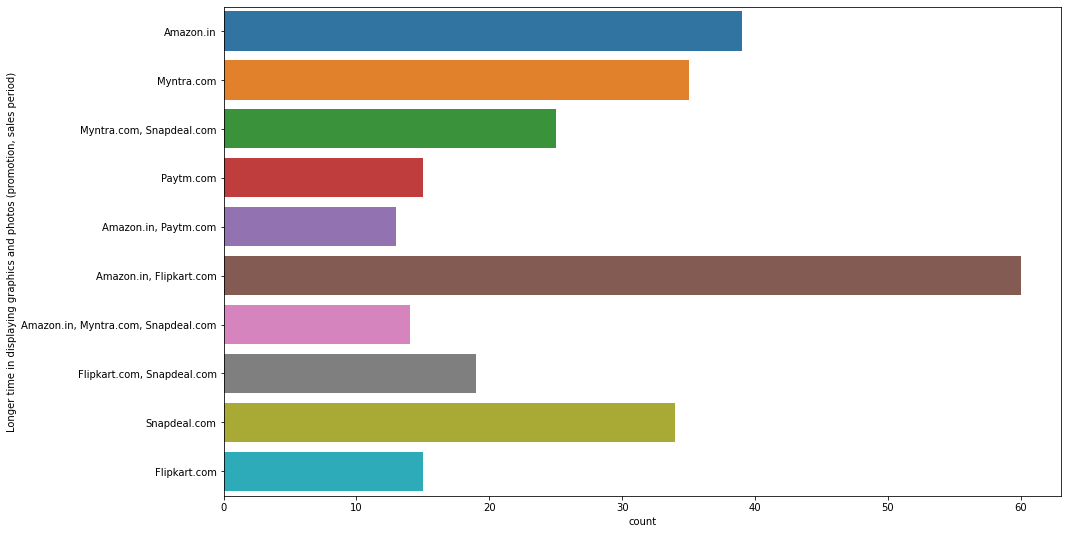

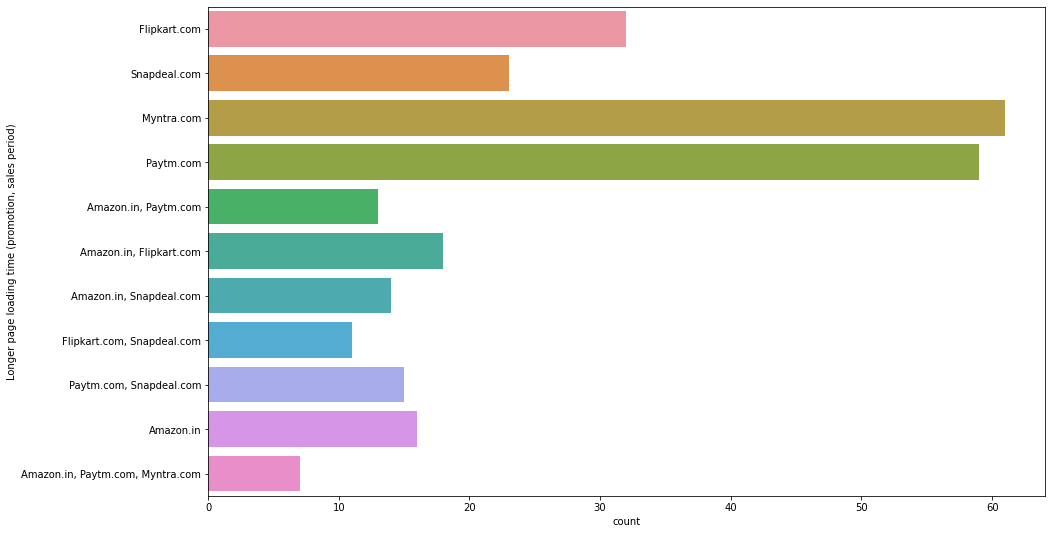

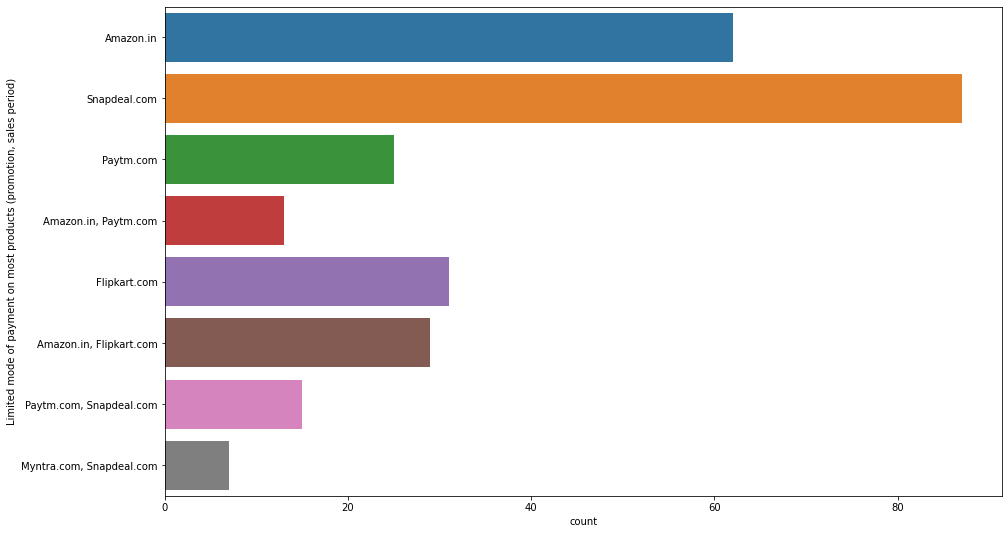

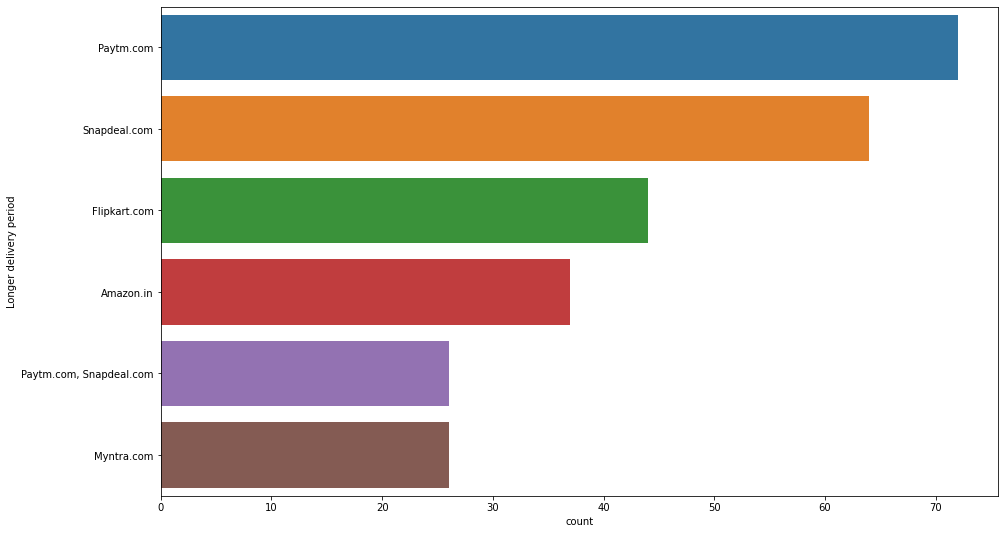

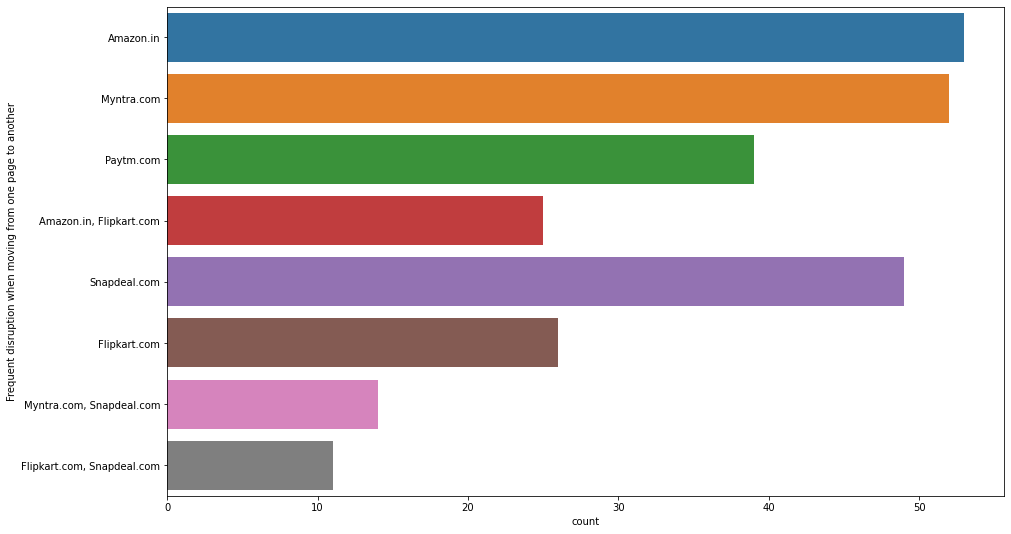

In [13]:
# count of the filtered data
for i in cr_dataset:
    plt.figure(figsize = (15,9))
    ax=sns.countplot(y=i,data=cr_dataset)
    plt.show()

In [14]:
# dataset dtype
for i in cr_dataset:
    print(i," : ",cr_dataset[i].dtypes,"\n")

Easy to use website or application  :  object 

Visual appealing web-page layout  :  object 

Wild variety of product on offer  :  object 

Complete, relevant description information of products  :  object 

Fast loading website speed of website and application  :  object 

Reliability of the website or application  :  object 

Quickness to complete purchase  :  object 

Availability of several payment options  :  object 

Speedy order delivery   :  object 

Privacy of customers’ information  :  object 

Security of customer financial information  :  object 

Perceived Trustworthiness  :  object 

Presence of online assistance through multi-channel  :  object 

Longer time to get logged in (promotion, sales period)  :  object 

Longer time in displaying graphics and photos (promotion, sales period)  :  object 

Late declaration of price (promotion, sales period)  :  object 

Longer page loading time (promotion, sales period)  :  object 

Limited mode of payment on most products (promot

Factors influencing the customer retention based on the univariate analysis is as follows:
1. Easy User Interface
2. Information of similar product highlighted with the current searched product also the seller information of the product.
3. Clear information of the product.
4. Loading and processing speed of the application or the website.
5. Convenient payment method.
6. Customer Service and privacy.
7. Net benefits and discounts.
8. Return and Replacement policy.
9. Wide variety of products availability on the website.
10. Value for money.
11. All the filtered data is ordinal


In [15]:
# converting ordinal data into numerical data 
le=LabelEncoder()
for i in cr_dataset:
    if cr_dataset[i].dtype=='object':
        cr_dataset[i]=le.fit_transform(cr_dataset[i])

Easy to use website or application


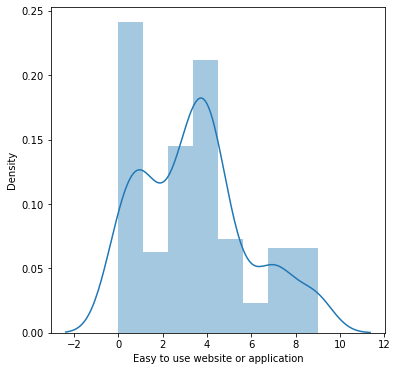

Visual appealing web-page layout


Wild variety of product on offer


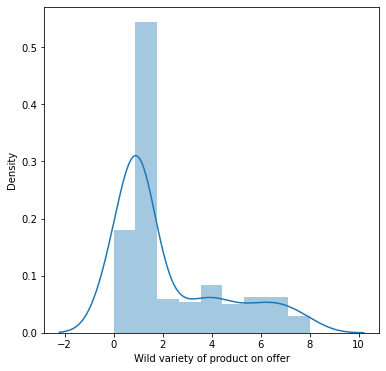

Complete, relevant description information of products


Fast loading website speed of website and application


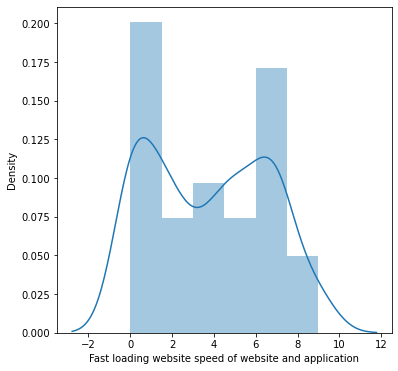

Reliability of the website or application


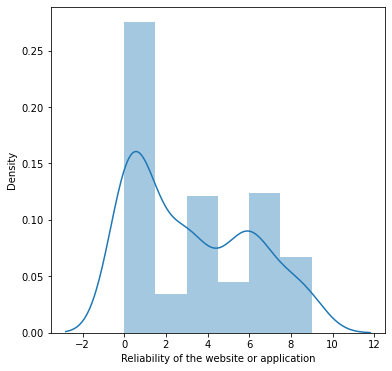

Quickness to complete purchase


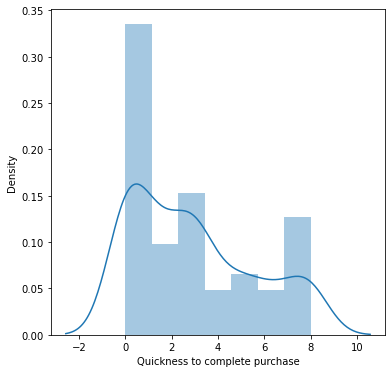

Availability of several payment options


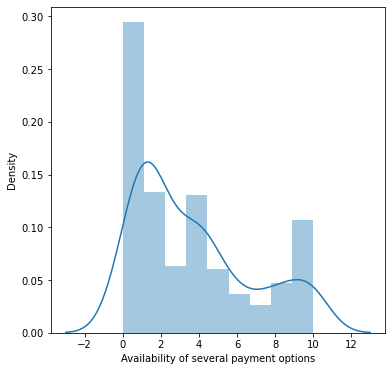

Speedy order delivery 


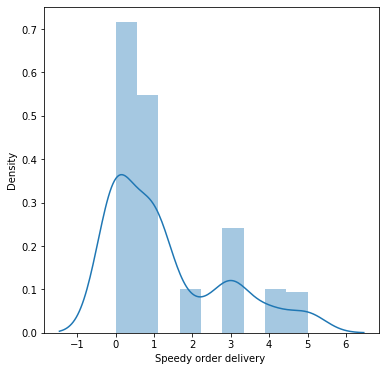

Privacy of customers’ information


Security of customer financial information


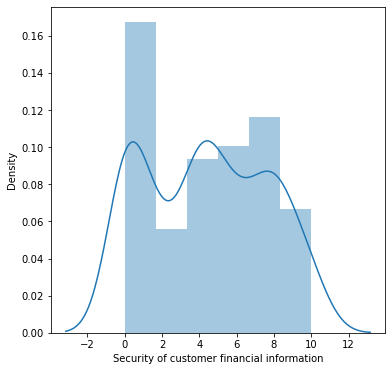

Perceived Trustworthiness


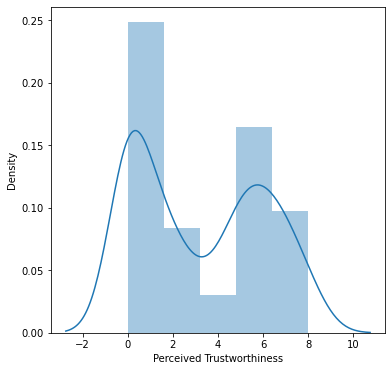

Presence of online assistance through multi-channel


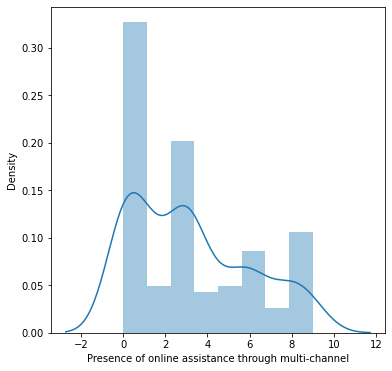

Longer time to get logged in (promotion, sales period)


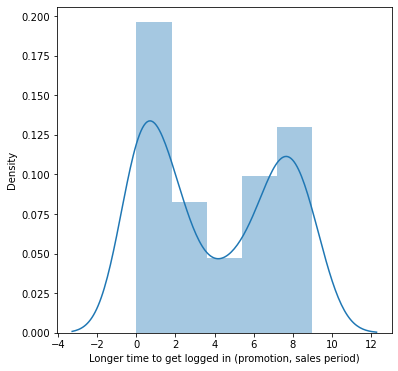

Longer time in displaying graphics and photos (promotion, sales period)


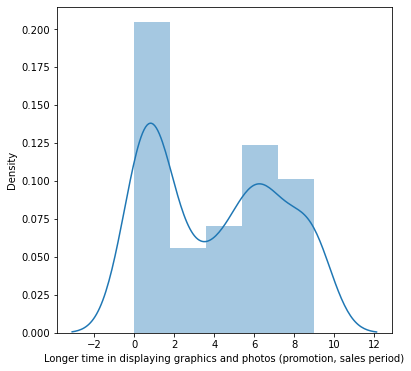

Late declaration of price (promotion, sales period)


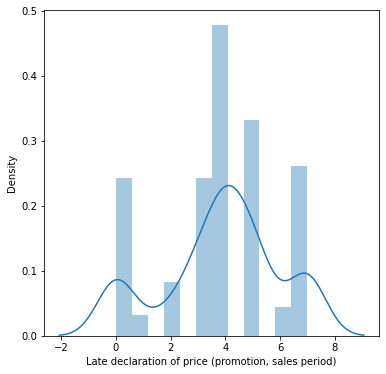

Longer page loading time (promotion, sales period)


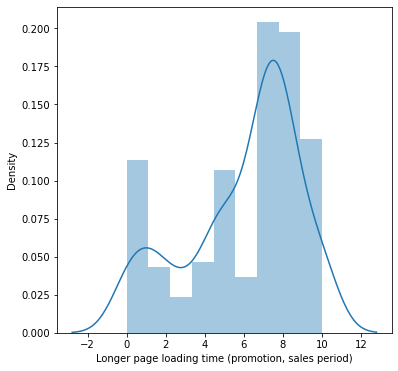

Limited mode of payment on most products (promotion, sales period)


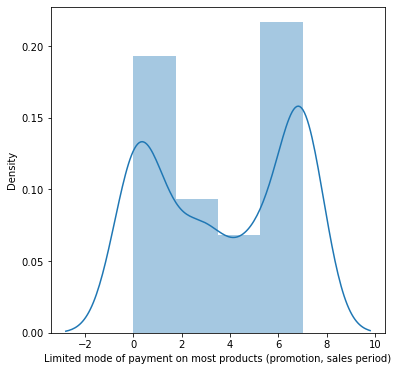

Longer delivery period


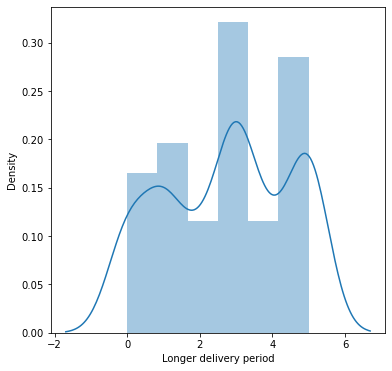

Change in website/Application design


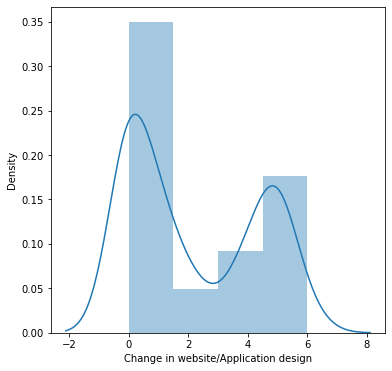

Frequent disruption when moving from one page to another


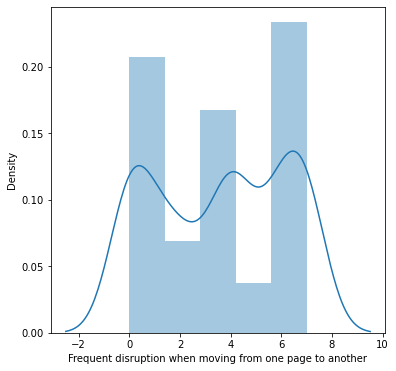

Website is as efficient as before


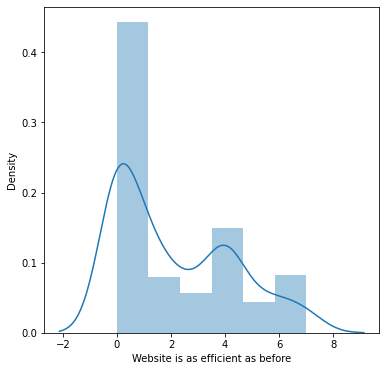

Which of the Indian online retailer would you recommend to a friend?


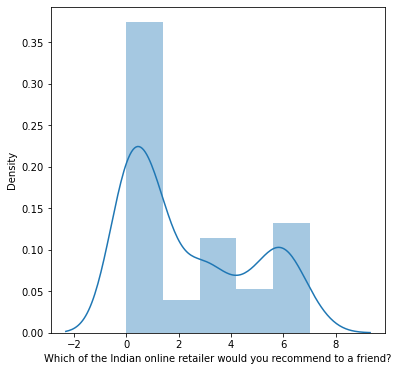

In [16]:
# normal distribution chart of each column
for i in cr_dataset:
    print(i)
    plt.figure(figsize=(6,6))
    sns.distplot(cr_dataset[i])
    plt.show()

Easy to use website or application


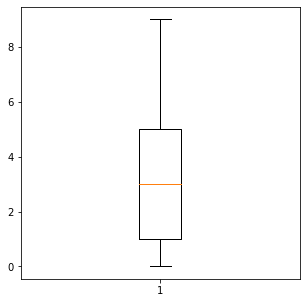

Visual appealing web-page layout


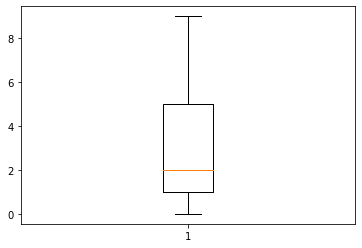

Wild variety of product on offer


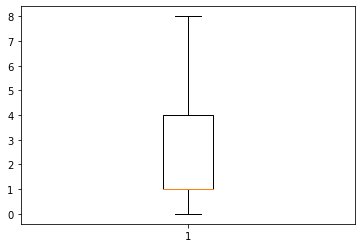

Complete, relevant description information of products


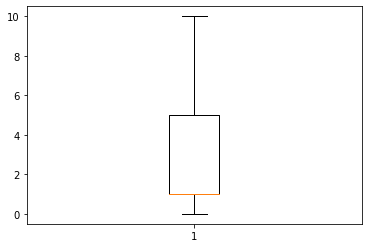

Fast loading website speed of website and application


Reliability of the website or application


Quickness to complete purchase


Availability of several payment options


Speedy order delivery 


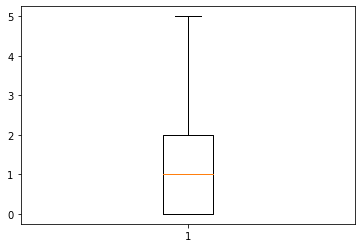

Privacy of customers’ information


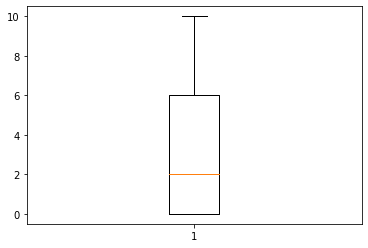

Security of customer financial information


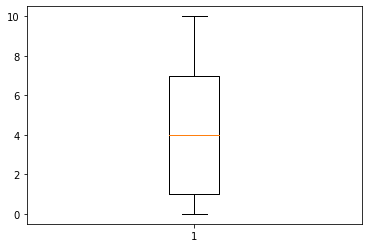

Perceived Trustworthiness


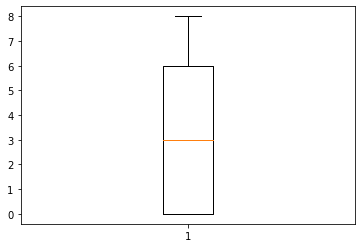

Presence of online assistance through multi-channel


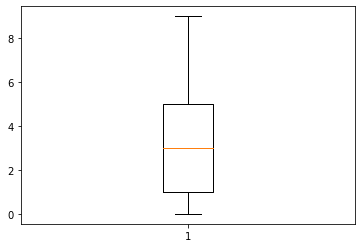

Longer time to get logged in (promotion, sales period)


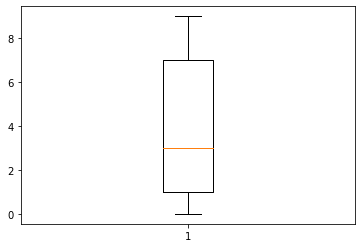

Longer time in displaying graphics and photos (promotion, sales period)


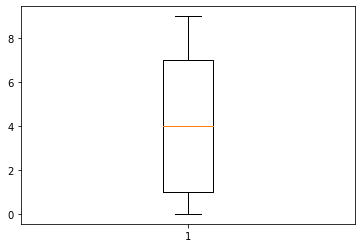

Late declaration of price (promotion, sales period)


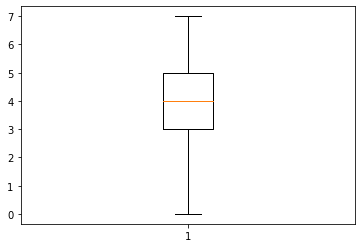

Longer page loading time (promotion, sales period)


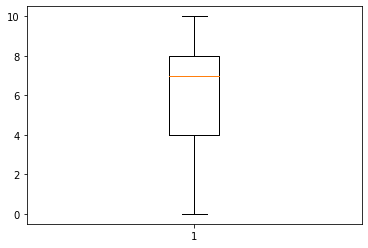

Limited mode of payment on most products (promotion, sales period)


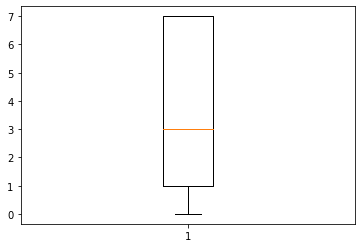

Longer delivery period


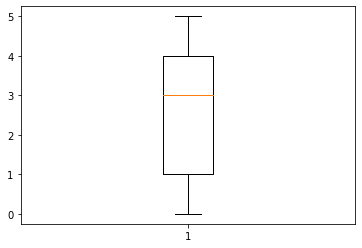

Change in website/Application design


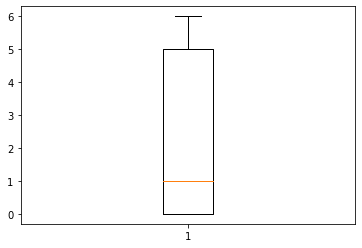

Frequent disruption when moving from one page to another


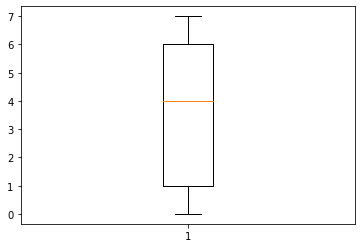

Website is as efficient as before


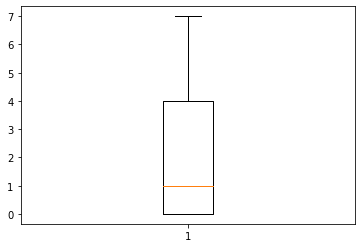

Which of the Indian online retailer would you recommend to a friend?


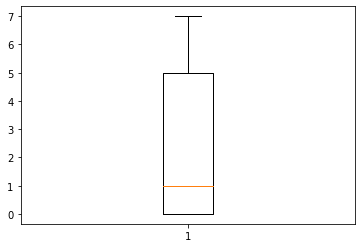

In [17]:
# looking for outliers in the dataset
fig = plt.figure(figsize =(5, 5))
for i in cr_dataset: 
    # Creating plot
    print(i)
    plt.boxplot(cr_dataset[i])
    # show plot
    plt.show()

# Feature Selection

In [18]:
# skewness in each column
for i in cr_dataset:
    print(i," : ",cr_dataset[i].skew(),"\n")

Easy to use website or application  :  0.5084144605075939 

Visual appealing web-page layout  :  0.8130154727957806 

Wild variety of product on offer  :  1.186070731869377 

Complete, relevant description information of products  :  0.9640996524210491 

Fast loading website speed of website and application  :  0.10630106687874231 

Reliability of the website or application  :  0.46483571247905797 

Quickness to complete purchase  :  0.6068584240067622 

Availability of several payment options  :  0.781632519503334 

Speedy order delivery   :  1.0612425194318165 

Privacy of customers’ information  :  0.7168602176354487 

Security of customer financial information  :  0.07352338420890925 

Perceived Trustworthiness  :  0.19944148122351193 

Presence of online assistance through multi-channel  :  0.5771658169395122 

Longer time to get logged in (promotion, sales period)  :  0.13109573143113173 

Longer time in displaying graphics and photos (promotion, sales period)  :  0.1675498961078

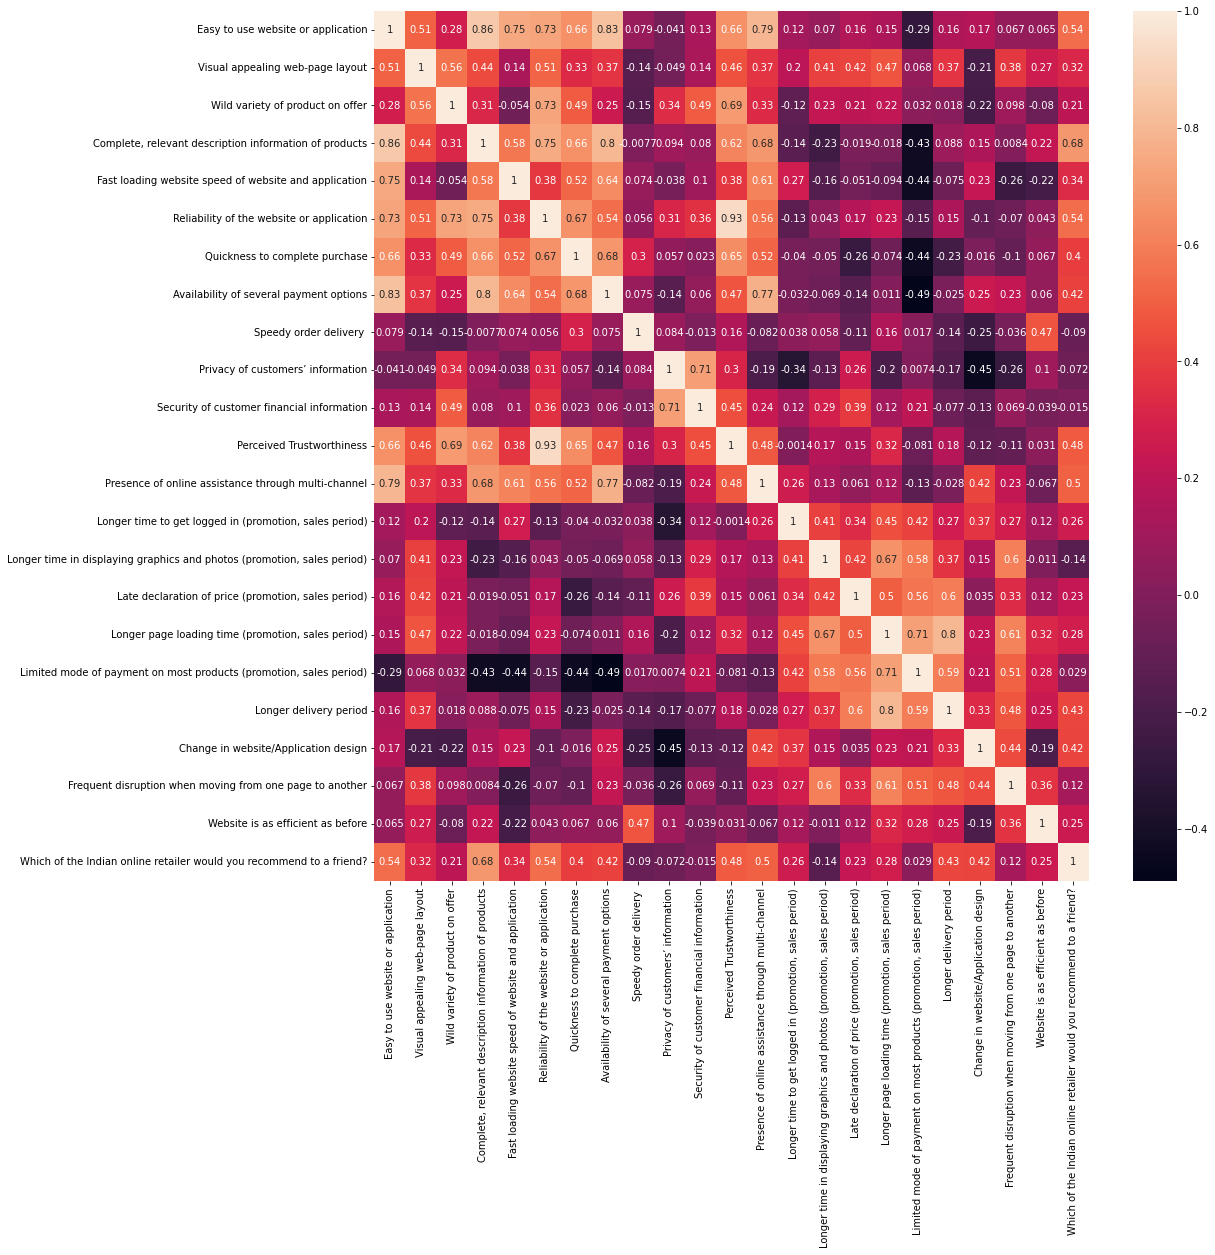

In [19]:
#corelation
plt.figure(figsize=(16,16))
sns.heatmap(cr_dataset.corr(), annot=True)
plt.show()

In [20]:
cr_dataset.drop(columns=['Visual appealing web-page layout','Complete, relevant description information of products',
                         'Fast loading website speed of website and application',
                        'Reliability of the website or application','Quickness to complete purchase','Availability of several payment options',
                        'Perceived Trustworthiness','Presence of online assistance through multi-channel',
                        'Longer time in displaying graphics and photos (promotion, sales period)','Late declaration of price (promotion, sales period)',
                        'Longer page loading time (promotion, sales period)'],inplace=True)

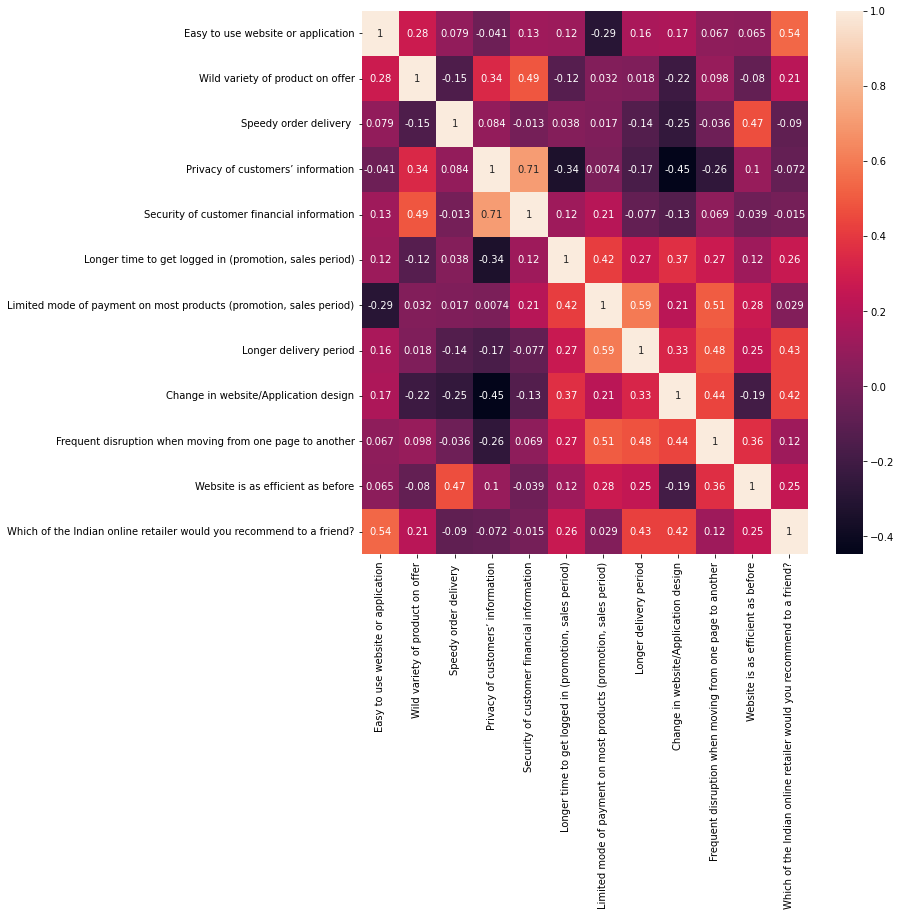

In [21]:
plt.figure(figsize=(10,10))
sns.heatmap(cr_dataset.corr(), annot=True)
plt.show()

In [22]:
cr_dataset.drop(columns=['Speedy order delivery ','Privacy of customers’ information',
                         'Longer time to get logged in (promotion, sales period)',
                        'Frequent disruption when moving from one page to another'
                        ],inplace=True)

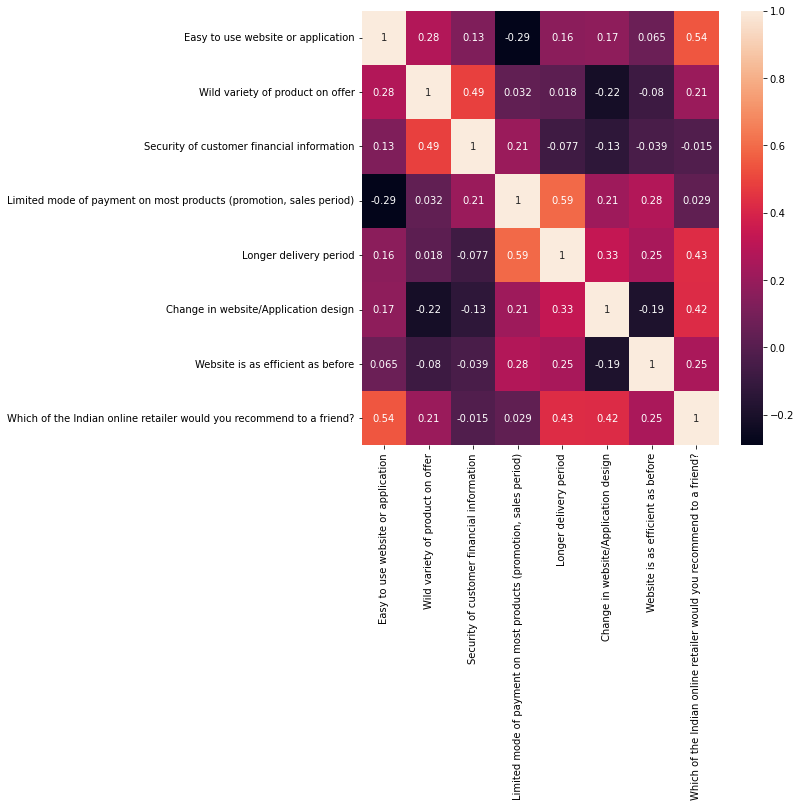

In [23]:
plt.figure(figsize=(8,8))
sns.heatmap(cr_dataset.corr(), annot=True)
plt.show()

In [24]:
cr_dataset.drop(columns=['Limited mode of payment on most products (promotion, sales period)'],inplace=True)

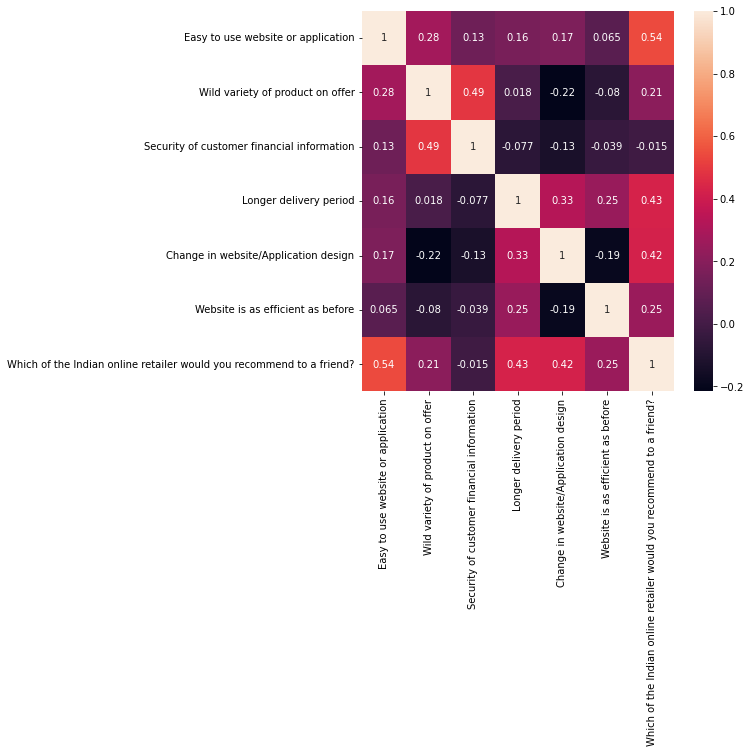

In [25]:
plt.figure(figsize=(7,7))
sns.heatmap(cr_dataset.corr(), annot=True)
plt.show()

In [26]:
cr_dataset.drop(columns=['Security of customer financial information'],inplace=True)

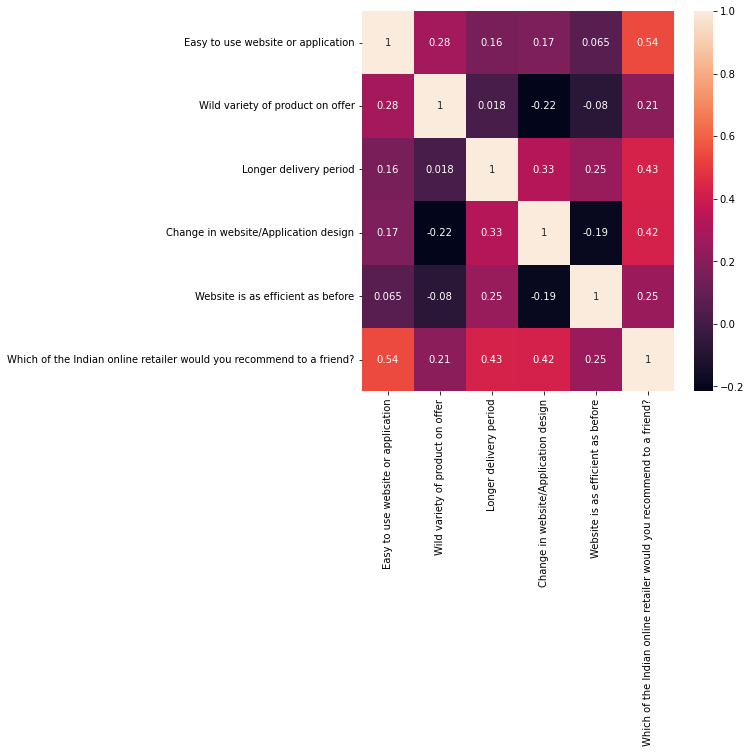

In [27]:
plt.figure(figsize=(7,7))
sns.heatmap(cr_dataset.corr(), annot=True)
plt.show()

In [28]:
X=cr_dataset.drop(columns=['Which of the Indian online retailer would you recommend to a friend?'])
Y=cr_dataset['Which of the Indian online retailer would you recommend to a friend?']

In [29]:
#Normalizing the data
scalar= StandardScaler()
X_scaled= scalar.fit_transform(X)

In [30]:
#checking VIF value 
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

vif_data["VIF"] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]
  
vif_data

feature       VIF
0    Easy to use website or application  1.181076
1      Wild variety of product on offer  1.229397
2                Longer delivery period  1.293854
3  Change in website/Application design  1.409064
4     Website is as efficient as before  1.223577

Class=6, n=39 (14.498%)
Class=3, n=30 (11.152%)
Class=5, n=20 (7.435%)
Class=1, n=62 (23.048%)
Class=4, n=13 (4.833%)
Class=7, n=11 (4.089%)
Class=0, n=79 (29.368%)
Class=2, n=15 (5.576%)


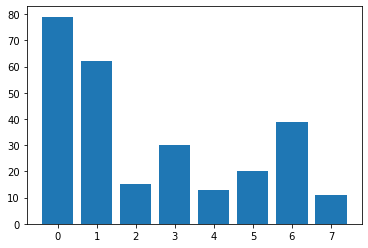

In [31]:
counter = Counter(Y)
for k,v in counter.items():
    per = v / len(Y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [32]:
oversample= SMOTE()
X_over,Y_over=oversample.fit_resample(X_scaled,Y)

Class=6, n=79 (12.500%)
Class=3, n=79 (12.500%)
Class=5, n=79 (12.500%)
Class=1, n=79 (12.500%)
Class=4, n=79 (12.500%)
Class=7, n=79 (12.500%)
Class=0, n=79 (12.500%)
Class=2, n=79 (12.500%)


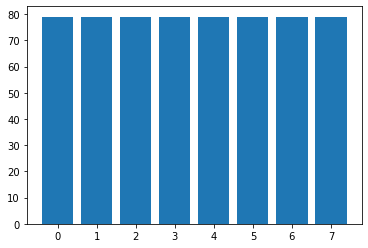

In [33]:
counter = Counter(Y_over)
for k,v in counter.items():
    per = v / len(Y_over) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

Summary:

1. Size of the Dataset is size.
2. No missing values in the dataset.
3. Dataset contains ordinal data
4. Converted ordinal data into numerical data.
5. Dataset has no outliers.
6. Feature selection of independent data is done via heatmap and VIF value.
7. Separate features and prediction variables into two separate list.
8. Used SMOTE to oversample the data and balance it
